# **Supermarket Store Campaign**

***

> **Background** :

Perilaku belanja konsumen untuk memenuhi kebutuhan sehari-hari masih menjadi proporsi terbesar dalam alokasi dari personal budget spending dimana supermarket merupakan tempat yang menjadi favorit untuk belanja kebutuhan sehari-hari(Bureau of Labor Statistics, 2020). Sehubung dengan beragam supermarket yang ada saat ini, Setiap supermarket harus tetap kompetitif yang terefleksikan dari peningkatan penjualan produk nya. Salah satu strategi untuk meningkatakan penjualan adalah dengan menerapkan strategi campaign sehingga semakin banyak pengunjung yang datang untuk berbelanja

> **Problem** :

Namun dalam menerapkan strategi campaign, supermarket harus mengetahui demografi konsumennya dan mengevaluasi strategi campaign sebelumnya berdasarkan data konsumen yang pernah berbelanja ke supermarket

> **Question** :

Berdasarkan problem tersebut, analisis ini akan menjawab beberapa research question dibawah ini untuk meningkatkan peforma penjualan supermarket dikemudian hari :
1. Bagaimana informasi demografi pengunjung supermarket?
2. Apakah strategi campaign sebelumnya sudah baik?
3. Bagaimana supermarket dapat melakukan treatment yang sesuai kepada pengunjung yang sudah pernah datang menggunakan metode RFM?

Dengan menjawab research question ini supermarket dapat menentukan target market untuk mendapatkan pengunjung baru sesuai dengan data demografi pengunjung sebelumnya dan menentukan strategi campaign yang tepat serta dapat melakukan treatment yang sesuai kepada pengunjung lama nya

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
from datetime import datetime

# **Data Understanding and Data Cleaning**

In [2]:
df = pd.read_csv('Supermarket Customers.csv', delimiter = '\t')

In [3]:
pd.set_option('display.max_columns', None)

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


Melihat sebaran tipe data dan null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Temuan :
1. Berdasarkan tipe data di setiap kolom, terdapat kolom yang memiliki tipe yang tidak sesuai yaitu pada kolom Dt_Customer yang seharusnya bertipe datetime.
2. Terdapat nilai null values sehingga perlu dilakukan cleaning

**Analisa pada data tipe int dan float**

> Melakukan Formatting pada kolom yang seharusnya bertipe tanggal

In [5]:
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y')

In [6]:
df['Year'] = df['Year_Birth'].dt.year

In [7]:
df.insert(1, 'Year', df.pop('Year'))

In [8]:
df.drop('Year_Birth', axis = 1, inplace = True)

In [9]:
df.rename(columns={'Year': 'Year_Birth'}, inplace = True)

In [10]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

> Melakukan visualisasi null values pada dataset

C:\Users\acer\AppData\Local\Temp\ipykernel_11060\3458324323.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


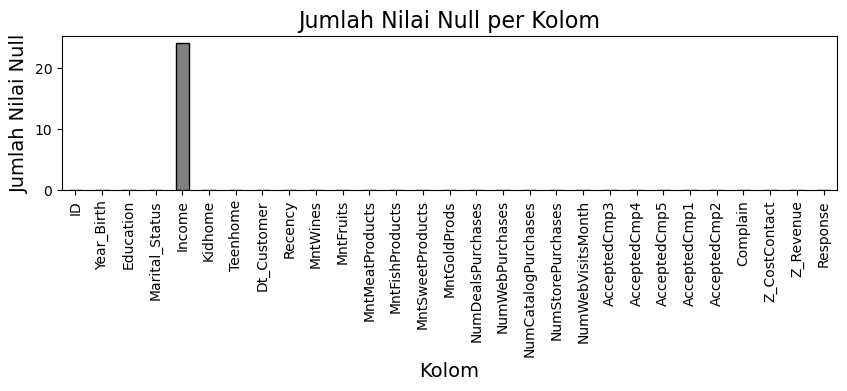

In [11]:
null_values = df.isnull().sum()


total_rows = len(df)
null_percentage = (null_values / total_rows) * 100  


plt.figure(figsize=(10, 2)) 
null_values.plot(kind='bar', color='gray', edgecolor='black')


plt.title('Jumlah Nilai Null per Kolom', fontsize=16)
plt.xlabel('Kolom', fontsize=14)
plt.ylabel('Jumlah Nilai Null', fontsize=14)


plt.xticks(rotation=90) 
plt.tight_layout()


plt.show()

In [12]:
# Cek persentase data yang hilang
missing_income = df['Income'].isna().sum()
total_data = len(df)
missing_percentage = (missing_income / total_data) * 100
print(f"Persentase data hilang di kolom 'Income': {missing_percentage:.2f}%")

Persentase data hilang di kolom 'Income': 1.07%


> Melakukan Treatment null values pada kolom income dengan cara meninjau median income berdasarkan level edukasi

In [13]:
# Membuat dummy dataframe untuk melihat sebaran data income berdasarkan level edukasi
df_income= df.copy()

In [14]:
# Melihat row yang berniali NaN pada kolom Income
income_null = df_income[df_income['Income'].isna()]
income_null

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


**Temuan** :
+ Pada data dengan variable education, terdapat Null values pada level graduation, PhD, Master, dan 2n Cycle. Kita akan hapus data NaN dan cek distribusi data nya menggunakan histogram
+ Kemudian kita akan melakukan treatment pengisian NaN value dengan Mean atau Median sesuai visualisasi plot histogram

In [15]:
# Drop NaN value di kolom Income terlebih dahulu
income_clean = df_income.dropna(subset=['Income'])

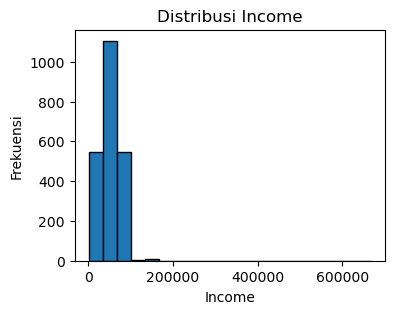

In [16]:
# Plot histogram untuk kolom 'Income'
plt.figure(figsize=(4,3))
plt.hist(income_clean['Income'], bins=20, edgecolor='black')
plt.title('Distribusi Income')
plt.xlabel('Income')
plt.ylabel('Frekuensi')
plt.show()

**Temuan** :
+ Dari histogram ini terlihat jelas data tidak berdistribusi normal, sehingga kita menggunakan median untuk mengisi NaN value pake kolom Income berdasarkan median dari kategori Level edukasi

In [17]:
# Hitung median income berdasarkan level pendidikan di income_clean
median_income_by_education = income_clean.groupby('Education')['Income'].median()

# Mengisi NaN di df berdasarkan median yang dihitung
df['Income'] = df['Income'].fillna(df['Education'].map(median_income_by_education))

> Melakukan modifikasi penambahan kolom baru untuk membuat analisa lebih detail

In [18]:
# Menggabungkan amount pengeluaran disetiap kategori barang belanja
df['Total Amount Spent']= df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] +df['MntGoldProds']

In [19]:
# Membuat kolom rate pengeluaran di setiap transaksi
df['Spend per transaction'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] +df['MntGoldProds'])/(df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebVisitsMonth'] )

In [20]:
# Membuat kolom total frekuensi pembelian konsumen
df['Total Purchase'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebVisitsMonth']

In [21]:
# Membuat kolom total yang accept campaign
df['Total Accept Offer'] = df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['AcceptedCmp1']+df['AcceptedCmp2']+df['Response']

In [22]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total Amount Spent,Spend per transaction,Total Purchase,Total Accept Offer
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52242.594866,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,605.798214,inf,20.178571,0.446875
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,5.000000,0.228571,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,68.750000,5.000000,14.000000,0.000000
50%,5458.500000,1970.000000,51498.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,396.000000,17.186090,19.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1045.500000,39.049654,25.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2525.000000,inf,46.000000,5.000000
std,3246.662198,11.984069,25039.061738,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,602.249288,NaN,7.293275,0.890543


**Temuan** :
+ Terdapat data yang memiliki nilai inf pada kolom Spend per Transaction
+ Kolom Z_CostContact dan Z_Revenue memiliki nilai yang sama pada batas min dan max nya, sehingga data di semua row pasti memiliki nilai yang sama. Oleh karena itu kita akan menghapus kolom ini dan tidak dijadikan analisa
+ Kolom Dt_Customer cukup tidak relevan dalam analisis ini, dikarenakan keterangan pada kolom tersebut hanyak menyatakan tanggal customer bergabung ke perusahaan (tanpa ada penjelasan hal yang dimaksud perusahaan)

In [23]:
# Melakukan drop kolom Z_Revenue dan Z_CostContact
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [24]:
# Melihat kolom bernilai inf
inf_rows = df[df['Spend per transaction'] == float('inf')]
display(inf_rows)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total Amount Spent,Spend per transaction,Total Purchase,Total Accept Offer
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,6,inf,0,0
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,8,inf,0,0


**Temuan** :
+ Terdapat 2 data yang memiliki 'inf' dikarenakan terdapat angka 0 pada total purchase di semua metode pembelian. Hal ini tidak logis dikarenakan apabila kita melihat data pada amount pembelian di setiap produk memiliki value. Sehingga seharusnya konsumen tersebut setidaknya membeli nya melalui stor, katalog, ataupun website
+ Untuk menangani nilai 0 ini, kita akan melakukan drop value untuk mempermudah proses analisis data

In [25]:
# Mengganti nilai 'inf' dengan 'NaN' langsung pada kolom tertentu (misalnya 'Spend per transaction') dan menghapusnya
df['Spend per transaction'].replace([float('inf'), -float('inf')], np.nan, inplace=True)

# Menghapus baris yang mengandung NaN pada kolom 'Spend per transaction'
df.dropna(subset=['Spend per transaction'], inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_11060\2562926498.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Spend per transaction'].replace([float('inf'), -float('inf')], np.nan, inplace=True)


In [26]:
# Drop Kolom Dt_Customer
df.drop('Dt_Customer', axis = 1, inplace = True)

> Melihat duplicate Value

In [27]:
df_duplicate = df.duplicated().sum()

if df_duplicate == 0:
    print('Tidak ada data yang terduplikat')

else:
    print('Terdapat data yang terduplikat')

Tidak ada data yang terduplikat


> Melakukan Plot histogram untuk melihat sebaran data bertipe int dan float

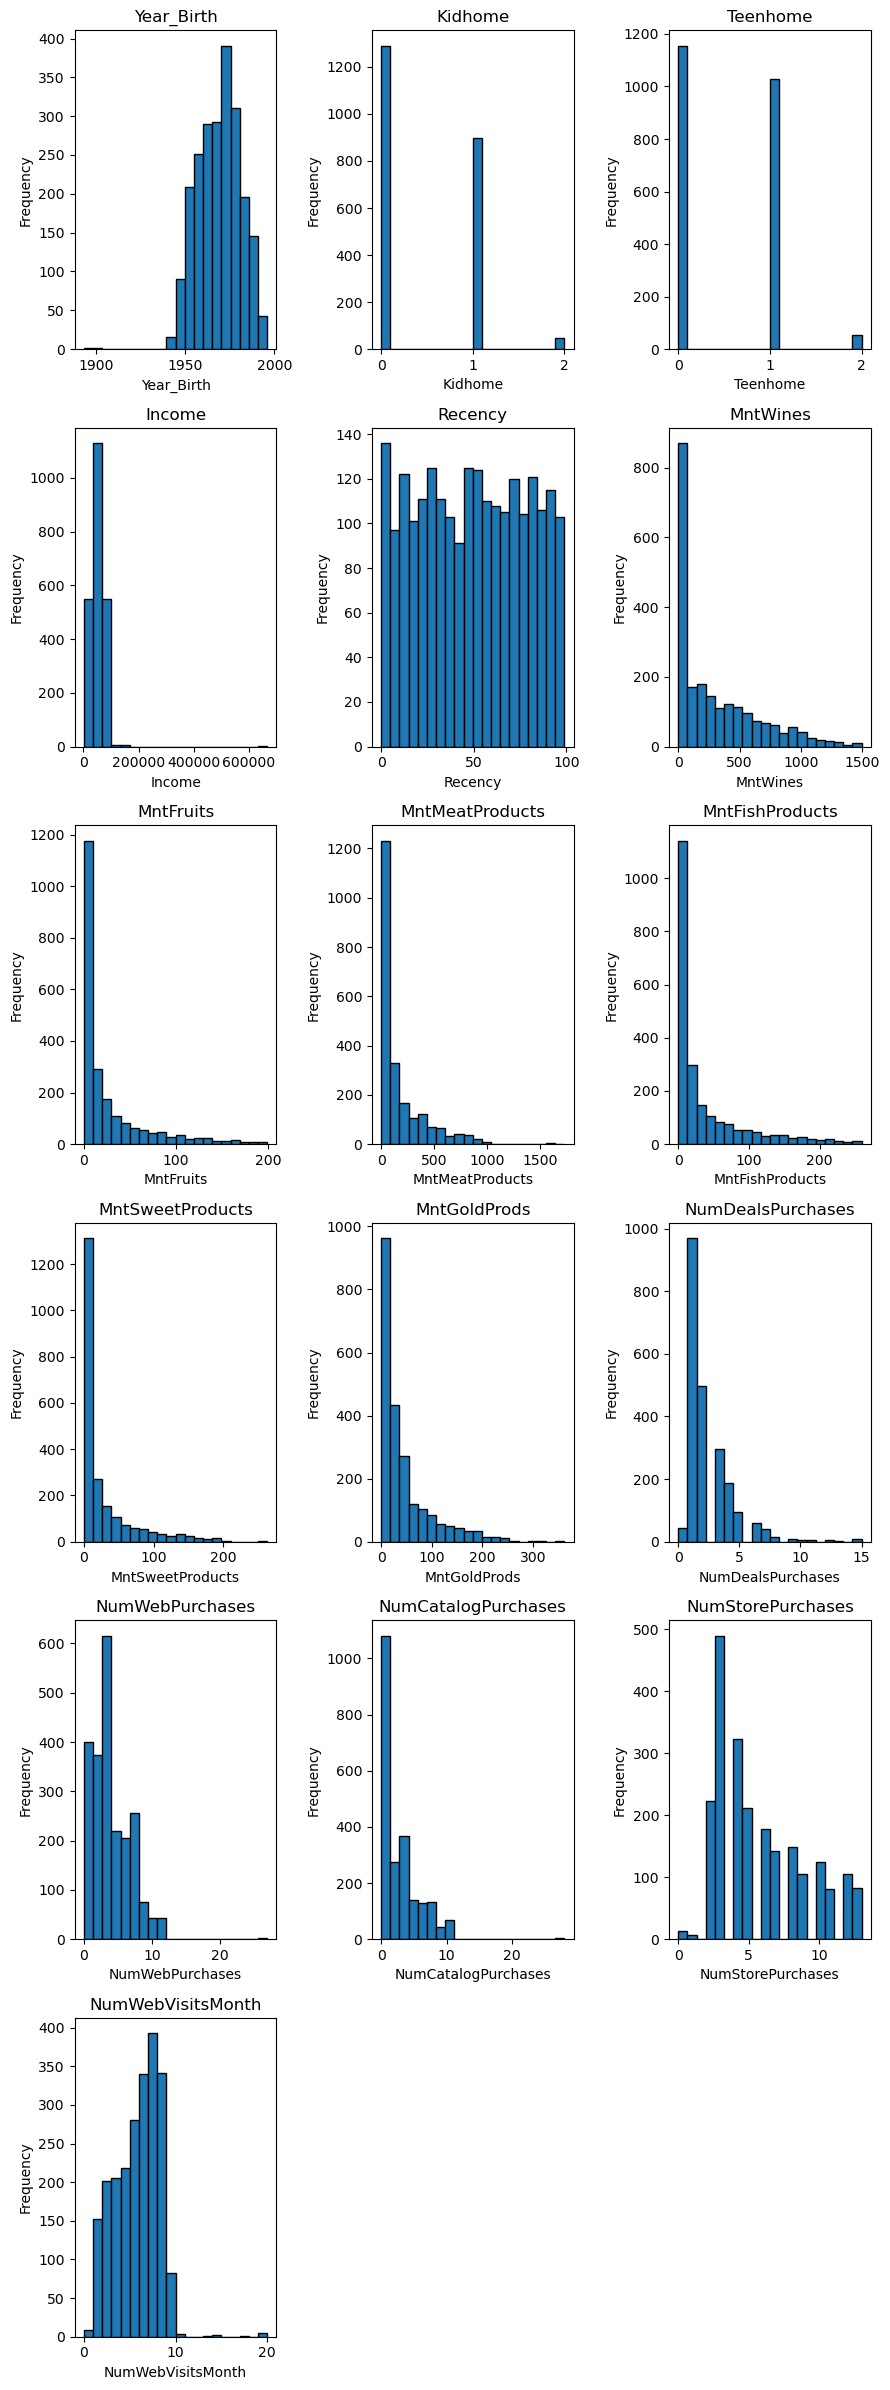

In [28]:
# Kolom yang ingin dipilih
selected_columns = ['Year_Birth','Kidhome','Teenhome','Income', 'Recency', 'MntWines', 'MntFruits', 
                    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
                    'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
                    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

n = len(selected_columns)
rows = (n // 3) + (n % 3 > 0)
cols = 3

plt.figure(figsize=(9, 4 * rows))

for i, col in enumerate(selected_columns):
    plt.subplot(rows, cols, i + 1)
    df[col].plot(kind='hist', bins=20, edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Mengatur layout agar lebih rapi
plt.tight_layout() 
plt.show()

> Melihat otulier data

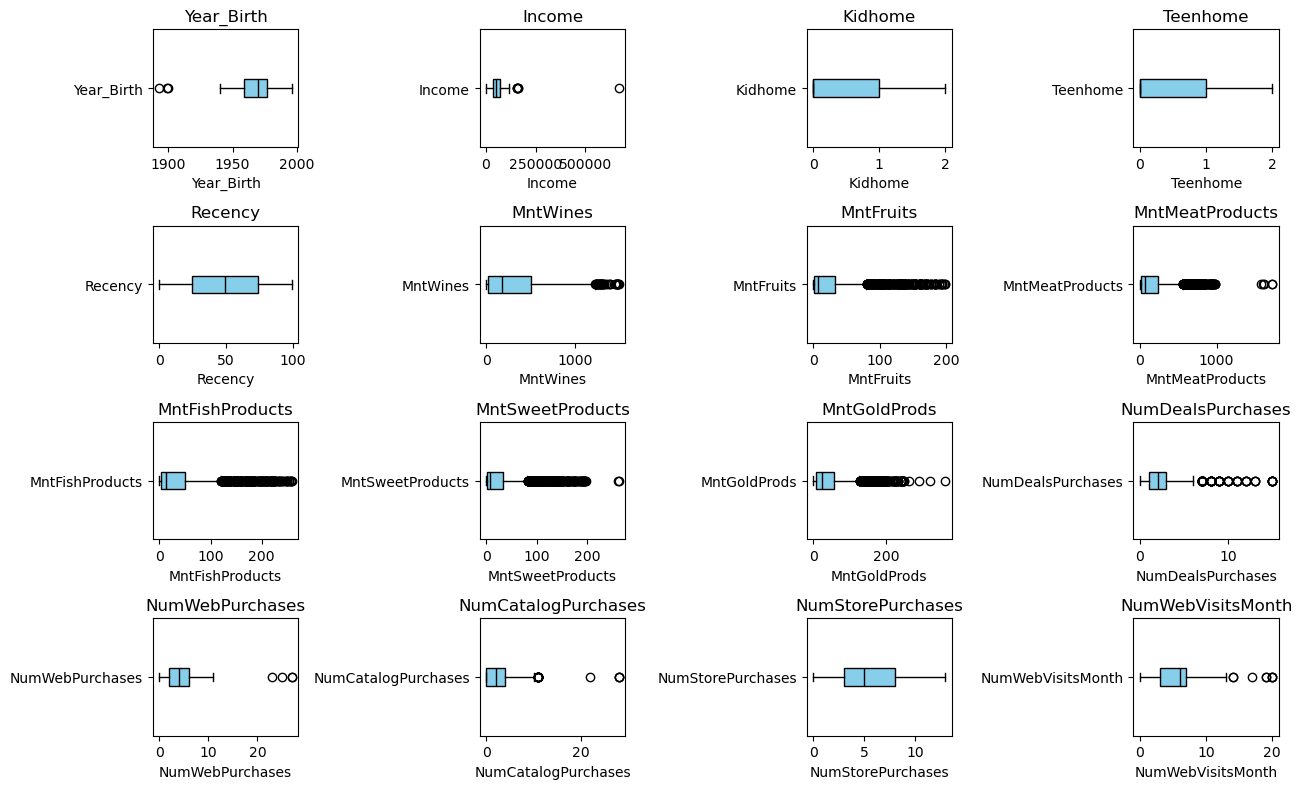

In [29]:
numerical_columns = df.select_dtypes(include=['float64', 'int64','int32']).columns

# Kolom-kolom biner yang ingin diabaikan
binary_columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response','Total Amount Spent','Spend per transaction', 'Total Purchase','Total Accept Offer','ID','Children','Is_Parent','Age']

# Filter kolom numerik untuk yang relevan (menghapus kolom biner)
relevant_columns = [col for col in numerical_columns if col not in binary_columns]

# Menentukan jumlah baris dan kolom untuk subplot
n = len(relevant_columns)
rows = (n // 4) + (n % 4 > 0)  # 4 kolom per baris
cols = 4  # Sesuaikan dengan jumlah kolom yang diinginkan

# Membuat subplots untuk boxplot
plt.figure(figsize=(13, 2 * rows))

# Membuat boxplot untuk setiap kolom numerik yang relevan
for i, col in enumerate(relevant_columns):
    plt.subplot(rows, cols, i + 1)  # Menentukan posisi subplot
    df[col].plot(kind='box', vert=False, color='black', patch_artist=True, boxprops=dict(facecolor='skyblue'))
    plt.title(col)  # Menambahkan judul sesuai nama kolom
    plt.xlabel(col)  # Menambahkan label sumbu x

# Menampilkan plot
plt.tight_layout()  # Menjaga agar tampilan tidak terpotong
plt.show()

> Mendeteksi outlier secara quantiatif

In [30]:
# Fungsi untuk mendeteksi outlier dengan IQR
def detect_outliers_iqr(df):
    # Daftar kolom yang tidak akan dilakukan deteksi outlier
    exclude_columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response','Total Amount Spent','Spend per transaction', 'Total Purchase','Total Accept Offer','ID','Children','Is_Parent','Age']
    
    # Iterasi melalui setiap kolom yang bukan dalam exclude_columns
    for column in df.select_dtypes(include=['float64', 'int64','int32']).columns:
        if column not in exclude_columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Deteksi outlier
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            
            # Output hasil
            print(f"Nilai outlier pada kolom '{column}' adalah sebanyak {outliers.shape[0]}")

# Menampilkan jumlah outlier per kolom
detect_outliers_iqr(df)

Nilai outlier pada kolom 'Year_Birth' adalah sebanyak 3
Nilai outlier pada kolom 'Income' adalah sebanyak 6
Nilai outlier pada kolom 'Kidhome' adalah sebanyak 0
Nilai outlier pada kolom 'Teenhome' adalah sebanyak 0
Nilai outlier pada kolom 'Recency' adalah sebanyak 0
Nilai outlier pada kolom 'MntWines' adalah sebanyak 35
Nilai outlier pada kolom 'MntFruits' adalah sebanyak 233
Nilai outlier pada kolom 'MntMeatProducts' adalah sebanyak 175
Nilai outlier pada kolom 'MntFishProducts' adalah sebanyak 223
Nilai outlier pada kolom 'MntSweetProducts' adalah sebanyak 248
Nilai outlier pada kolom 'MntGoldProds' adalah sebanyak 207
Nilai outlier pada kolom 'NumDealsPurchases' adalah sebanyak 86
Nilai outlier pada kolom 'NumWebPurchases' adalah sebanyak 4
Nilai outlier pada kolom 'NumCatalogPurchases' adalah sebanyak 23
Nilai outlier pada kolom 'NumStorePurchases' adalah sebanyak 0
Nilai outlier pada kolom 'NumWebVisitsMonth' adalah sebanyak 8


**Temuan** :
+ Kolom income yang memiliki outlier masih dianggap hal yang logis. Terdapat konsumen yang memiliki income yang sangat besar dibandingkan dengan konsumen lainnya
+ Kolom MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds memiliki nilai outlier yang terjadi secara logis. Terdapat konsumen dengan ketertarikan berlebih terhadap suatu produk dikarenakan barang dalam harga diskon atau barang tersebut menjadi favorit konsumen
+ Kolom NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth terjaadi secara logis. Terdapat konsumen dengan preferensi media pembelian yang berlebih dikarenakan sesuai dengan kenyamanan konsumen
+ Kolom Year_Birth memiliki nilai outliner yang tidak logis. Pada kolom Year_Birth memiliki tahun kelahiran yang usia nya melewati umur 100 tahun terhitung dari tahun ini (2025). sehingga perlu dilakukan drop kolom pada usia tersebut

> Melakukan drop pada kolom Year_Birth yang memiliki outliers

In [31]:
# Melakukan drop value pada kolom Year Birth yang memiliki Outlier
index_to_drop = df[df['Year_Birth'].isin([1900, 1899, 1893])].index
df.drop(index_to_drop,inplace = True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2235 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2235 non-null   int64  
 1   Year_Birth             2235 non-null   int32  
 2   Education              2235 non-null   object 
 3   Marital_Status         2235 non-null   object 
 4   Income                 2235 non-null   float64
 5   Kidhome                2235 non-null   int64  
 6   Teenhome               2235 non-null   int64  
 7   Recency                2235 non-null   int64  
 8   MntWines               2235 non-null   int64  
 9   MntFruits              2235 non-null   int64  
 10  MntMeatProducts        2235 non-null   int64  
 11  MntFishProducts        2235 non-null   int64  
 12  MntSweetProducts       2235 non-null   int64  
 13  MntGoldProds           2235 non-null   int64  
 14  NumDealsPurchases      2235 non-null   int64  
 15  NumWebPur

**Analisa pada data tipe kategorikal**

C:\Users\acer\AppData\Local\Temp\ipykernel_11060\3450807041.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df, palette='hot', ax=axes[i])  # Ubah 'x' menjadi 'y' untuk orientasi horizontal
C:\Users\acer\AppData\Local\Temp\ipykernel_11060\3450807041.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df, palette='hot', ax=axes[i])  # Ubah 'x' menjadi 'y' untuk orientasi horizontal


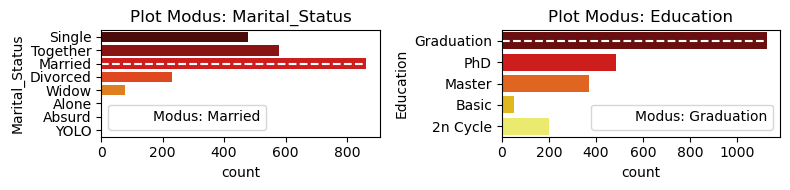

In [33]:
# Pilih kolom kategorikal, misalnya 'Marital_Status' dan 'Education'
categorical_columns = ['Marital_Status', 'Education']  # Ubah dengan kolom kategorikal yang relevan

# Set up the figure and axes (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(8, 2))  # Menyiapkan 1 baris dan 2 kolom

# Plot modus untuk setiap kolom kategorikal
for i, column in enumerate(categorical_columns):
    mode_value = df[column].mode()[0]  # Ambil nilai modus
    
    # Plot bar modus dengan orientasi horizontal
    sns.countplot(y=column, data=df, palette='hot', ax=axes[i])  # Ubah 'x' menjadi 'y' untuk orientasi horizontal
    
    # Tambahkan garis horizontal pada modus
    axes[i].axhline(y=df[column].value_counts().idxmax(), color='white', linestyle='--', label=f'Modus: {mode_value}')
    
    # Judul dan rotasi
    axes[i].set_title(f'Plot Modus: {column}')
    axes[i].legend()

# Tampilkan plot
plt.tight_layout()
plt.show()

**Temuan** :
+ Dapat dilihat bahwa modus pada kolom marital_status ialah Married dan modus pada kolom Education ialah Graduation. Pada kolom Marital_Status dapat kita sederhanakan penamaan value nya dan pada kolom education juga bisa di sederhanakan penaamaan value nya

> Untuk penyederhanaan value pada kolom Marital_status, kita perlu cek korelasi antara Marital_status dengan jumlah kolom kidhome dan teenhome untuk melihat apakah terdapat kejanggalan data

In [34]:
# Melakukan modifikasi table dengan cara menentukan apakah suatu ID memiliki anak atau tidak
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Is_Parent'] = np.where(df.Children > 0, 1, 0)

In [35]:
# Melihat perbandingan frekuensi Kolom Marital_Status dan frekuensi 
Marital_Children = df.groupby('Marital_Status').agg(
    Kepemilikan_Anak=('Is_Parent', lambda x: (x == 1).sum())
)

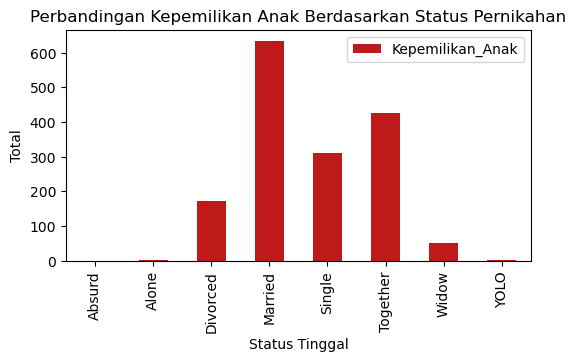

In [36]:
Marital_Children.plot(kind='bar', figsize=(6, 3), color=['#bf1a1a', "#d8cb13"])
plt.xlabel('Status Tinggal')
plt.ylabel('Total')
plt.title('Perbandingan Kepemilikan Anak Berdasarkan Status Pernikahan')

plt.show()

**Temuan** :
+ Berdasarkan plot bar tersebut, terlihat bahwa Value Absurd, alone, dan YOLO memiliki nilai yang sangat kecil, sehingga apabila dianalisa tidak akan berdampak apapun. Kita bisa menggabungkan value alone, widow, Absurd, dan Yolo dengan kategori single. Single dapat diartikan seseorang yang tinggal sendiri yang mungkin memiliki anak juga (karena bercerai) ataupun tidak memiliki anak karena faktor lain (bisa karena memang sendiri atau bercerai tanpa anak). Oleh karena itu, value divorced dapat di kategorikan sebagai single juga.
+ Value pada kolom married dan together juga dapat di lebur menjadi sebuah istilah baru "Partner" karena kedua value tersebut memiliki makna yang sama secara bahasa

> Melebur categorical value dari kolom Marital_Status

In [37]:
# Mengelompokkan data pada kolom Marital_Status menjadi
df['Living_With'] = df['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Alone':'Single', 'Widow':'Single','Divorced':'Single','Absurd':'Single','YOLO':'Single'})

> Mengkelompokkan kolom Education
+ Secara tata bahasa 2nd cycle dan basic dapat diartikan sebagai mahasiswa undergraduate (belum lulus). Sehingga kedua value kategorikal ini dapat dikelompokkan menjadi satu

In [38]:
# Mengelompokkan data pada kolom Education
df['Education'] = df['Education'].replace({'2n Cycle':'Undergraduate', 'Basic':'Undergraduate', 'Graduation':'Graduate'})

In [39]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total Amount Spent,Spend per transaction,Total Purchase,Total Accept Offer,Children,Is_Parent,Living_With
0,5524,1957,Graduate,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,50.531250,32,1,0,0,Single
1,2174,1954,Graduate,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,2.454545,11,0,2,1,Single
2,4141,1965,Graduate,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,31.040000,25,0,0,0,Partner
3,6182,1984,Graduate,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,3.785714,14,0,1,1,Partner
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,17.583333,24,0,1,1,Partner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,1341,58.304348,23,0,1,1,Partner
2236,4001,1946,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,444,15.310345,29,1,3,1,Partner
2237,7270,1981,Graduate,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,1241,49.640000,25,1,0,0,Single
2238,8235,1956,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,843,32.423077,26,0,1,1,Partner


## **Exploring Data Analysis**

Pada bagian pertama kita akan melihat segmentasi pasar berdasarkan pengunjung supermarket yang pernah datang untuk berbelanja

> **DEMOGRAFI**

    **Kategori Usia**

In [40]:
# Menghitung usia konsumen terhitung sejak tahun 2025

current_year = datetime.now().year

df['Age'] = current_year - df['Year_Birth']

def kategori_usia (age):
    if age < 35:
        return 'Youth'
    
    if age >= 35 and age < 50:
        return 'Middle Age'
    else :
        return 'Elderly'
    
df['Generation'] = df['Age'].apply(kategori_usia)

df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total Amount Spent,Spend per transaction,Total Purchase,Total Accept Offer,Children,Is_Parent,Living_With,Age,Generation
0,5524,1957,Graduate,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,50.531250,32,1,0,0,Single,68,Elderly
1,2174,1954,Graduate,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,2.454545,11,0,2,1,Single,71,Elderly
2,4141,1965,Graduate,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,31.040000,25,0,0,0,Partner,60,Elderly


In [41]:
# Membuat pengelompokkan usia berdasarkan generasi
Generation = df['Generation'].value_counts().reset_index()
Generation

,Generation,count
0,Elderly,1540
1,Middle Age,652
2,Youth,43


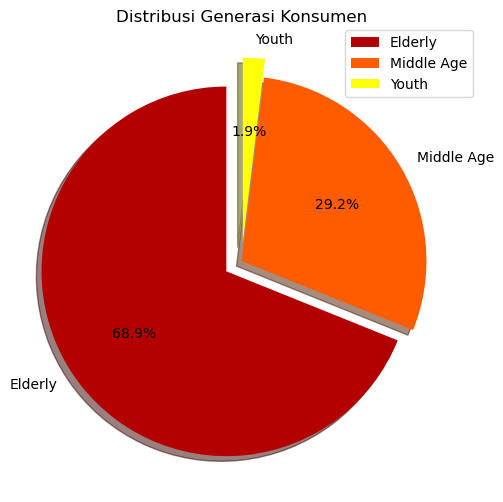

In [42]:
# Plot kedalam grafik
color = sns.color_palette("hot", len(Generation))
plt.figure(figsize=(6, 6))
plt.pie(x=Generation['count'], labels=Generation['Generation'],explode=[0.1,0.0,0.1], autopct='%1.1f%%', shadow=True, startangle=90, colors=color)

plt.title('Distribusi Generasi Konsumen')
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0)

**Temuan** :
+ Mayoritas pengunjung pada supermarket ini adalah golongan generasi Elderly (Tua)

    **Kategori Status keluarga**

In [43]:
# Membuat pengelompokkan berdasarkan status tinggal
status = df['Living_With'].value_counts().reset_index()
status

,Living_With,count
0,Partner,1442
1,Single,793


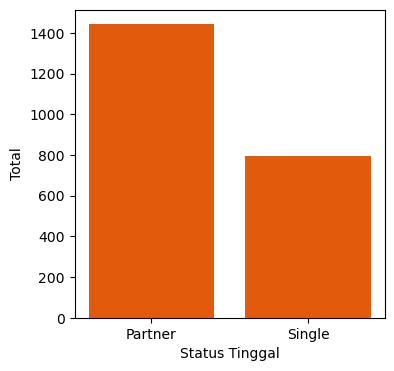

In [44]:
# Membuat plot grafik
plt.figure(figsize = (4,4))
plt.bar(x= status['Living_With'], height = status['count'], color = "#e25b0d")
plt.xlabel('Status Tinggal')
plt.ylabel('Total')
plt.show()

**Temuan** :
+ Berdasarkan status tinggal, konsumen dengan status partner mendominasi kelompok konsumen

In [45]:
# Membuat table pengelompokkan kepemilikan anak berdasarkan status tinggal
parent = pd.crosstab(df['Living_With'], df['Is_Parent'], normalize='index') * 100
parent = parent.rename(columns={0: 'Tidak Punya Anak', 1: 'Punya Anak'})
parent

Is_Parent,Tidak Punya Anak,Punya Anak
Living_With,,
Partner,26.490985,73.509015
Single,31.904161,68.095839


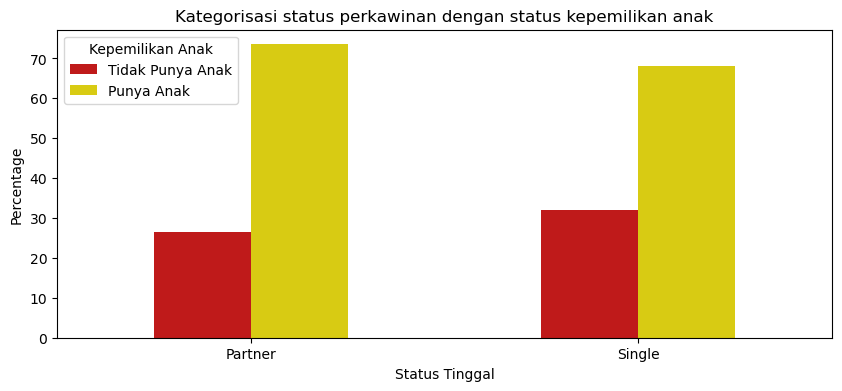

In [46]:
# Plot grafik
parent.plot(kind='bar', figsize=(10, 4), color=['#bf1a1a', "#d8cb13"])
plt.xlabel('Status Tinggal')
plt.ylabel('Percentage')
plt.title('Kategorisasi status perkawinan dengan status kepemilikan anak')

plt.legend(title="Kepemilikan Anak", loc='upper left')
plt.xticks(rotation=360)

plt.show()

**Temuan** :
+ Berdasarkan status keluarga, konsumen didominasi populasi yang tinggal bersama
+ Status kepemilikian mempunyai anak juga mendominasi untuk status keluarga single maupun keluarga

    **Kategori level edukasi**

In [47]:
# Membuat pengelompokkan level edukasi
ld  = df['Education'].value_counts().reset_index()
ld

,Education,count
0,Graduate,1126
1,PhD,484
2,Master,370
3,Undergraduate,255


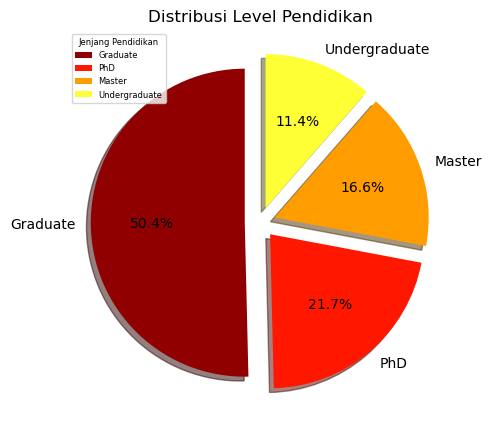

In [48]:
# Melakukan plot grafik
color = sns.color_palette("hot", len(ld))
plt.figure(figsize=(5, 5))
plt.pie(x=ld['count'], labels=ld['Education'],explode=[0.1,0.1,0.1,0.1], autopct='%1.1f%%', shadow=True, startangle=90, colors=color)

plt.title('Distribusi Level Pendidikan')
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0)
plt.legend(title="Jenjang Pendidikan",title_fontsize=6, loc='upper left', fontsize=6)

**Temuan** :
+ Berdasarkan pembagian level pendidikan dengan status Graduate mendominasi pasar konsumen supermarket

> **POLA BELANJA KONSUMEN**

In [49]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total Amount Spent,Spend per transaction,Total Purchase,Total Accept Offer,Children,Is_Parent,Living_With,Age,Generation
0,5524,1957,Graduate,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,50.531250,32,1,0,0,Single,68,Elderly
1,2174,1954,Graduate,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,2.454545,11,0,2,1,Single,71,Elderly
2,4141,1965,Graduate,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,31.040000,25,0,0,0,Partner,60,Elderly


    **MELIHAT POLA INCOME KONSUMEN**

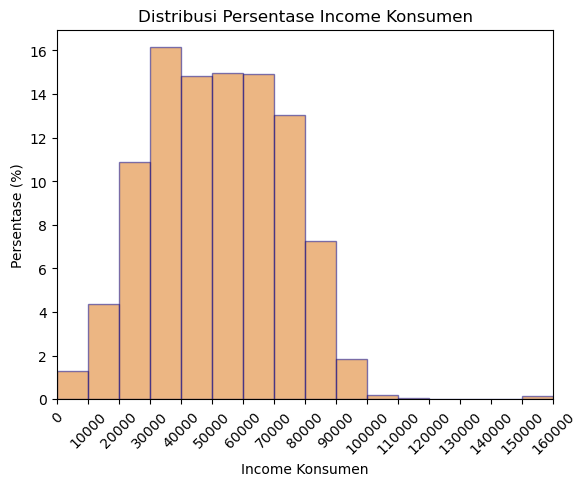

In [130]:
# Membandingkan persentase pengeluaran konsumen

bins = np.arange(0, 160001, 10000)

plt.hist(df['Income'], bins=bins, weights=np.ones(len(df['Income'])) / len(df['Income']) * 100, alpha=0.5, color="#db6e0896", edgecolor='darkblue')

plt.xlabel('Income Konsumen')
plt.ylabel('Persentase (%)')
plt.title('Distribusi Persentase Income Konsumen')

plt.xlim(0, 160000)
plt.xticks(np.arange(0, 160001, 10000), rotation=45)

# Menampilkan plot
plt.show()

Temuan :
+ Apabila ditinjau dari sebaran data income konsumen, persentase terbesar income berada di level 30000 hingga 70000

In [51]:
# Membuat pivot table untuk nilai median Income berdasarkan Education dan Generation
Gen_income = df.pivot_table(values='Income', index='Education', columns='Generation', aggfunc='mean', fill_value=0)
Gen_income['Total'] = Gen_income.sum(axis=1)
Gen_income_sorted = Gen_income.sort_values(by='Total', ascending=False)
Gen_income_sorted.drop('Total', axis=1,inplace=True)
# Menampilkan hasil yang sudah diurutkan
display(Gen_income_sorted)

Generation,Elderly,Middle Age,Youth
Education,,,
Master,54286.557143,47122.953488,79201.250000
PhD,55875.761039,55456.687500,68496.666667
Graduate,54040.372825,48900.681690,63601.083333
Undergraduate,47907.609375,35603.182609,36685.750000


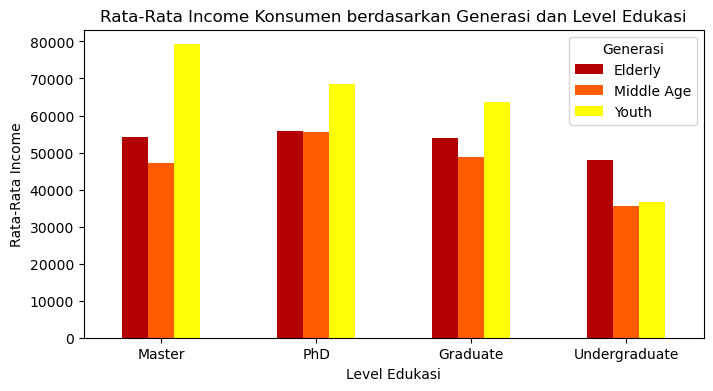

In [52]:
# Plot grafik
color_palette = sns.color_palette("hot", n_colors=len(Gen_income_sorted.columns)) 
Gen_income_sorted.plot(kind='bar', figsize=(8, 4), color= color_palette)
plt.xlabel('Level Edukasi')
plt.ylabel('Rata-Rata Income')
plt.title('Rata-Rata Income Konsumen berdasarkan Generasi dan Level Edukasi')

plt.legend(title="Generasi", loc='upper right')
plt.xticks(rotation=360)

plt.show()

**Temuan**:
+ Dapat dilihat pada plot rata-rata income, konsumen generasi youth dengan level master memiliki rata-rata income yang paling besar dibandingkan dengan lainnya 

    **MELIHAT POLA SPENDING KONSUMEN**

In [53]:
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total Amount Spent,Spend per transaction,Total Purchase,Total Accept Offer,Children,Is_Parent,Living_With,Age,Generation
0,5524,1957,Graduate,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,50.531250,32,1,0,0,Single,68,Elderly
1,2174,1954,Graduate,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,2.454545,11,0,2,1,Single,71,Elderly


In [54]:
# Membuat perbandingan total complain dan tidak
cc = df['Complain'].value_counts().rename(index = {1 : 'Iya', 0 : 'Tidak'})
cc = cc.reset_index()
cc

,Complain,count
0,Tidak,2215
1,Iya,20


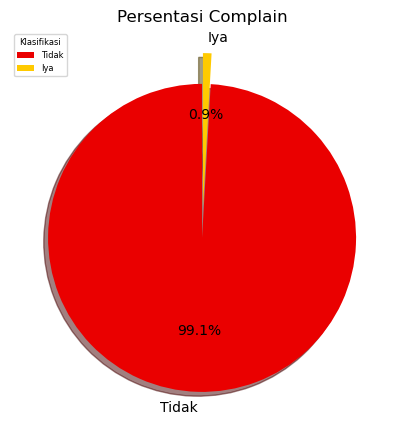

In [55]:
# Plot pie chart
color = sns.color_palette("hot", len(cc))

plt.figure(figsize=(5, 5))
plt.pie(x=cc['count'], labels=cc['Complain'], explode=[0.1, 0.1], autopct='%1.1f%%', 
        shadow=True, startangle=90, colors=color)

plt.title('Persentasi Complain')

plt.legend(title="Klasifikasi", title_fontsize=6, loc='upper left', fontsize=6)

plt.show()

**Temuan** :
+ Jumlah konsumen yang komplain sangat sedikit dibandingkan dengan yang tidak komplain

Lower Bound: -13611.5, Upper Bound: 117304.5
Outliers Detected:
        ID  Year_Birth Education Marital_Status    Income  Kidhome  Teenhome  \
164   8475        1973       PhD        Married  157243.0        0         1   
617   1503        1976       PhD       Together  162397.0        1         1   
687   1501        1982       PhD        Married  160803.0        0         0   
1300  5336        1971    Master       Together  157733.0        1         0   
1653  4931        1977  Graduate       Together  157146.0        0         0   
2233  9432        1977  Graduate       Together  666666.0        1         0   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
164        98        20          2             1582                1   
617        31        85          1               16                2   
687        21        55         16             1622               17   
1300       37        39          1                9                2   
1653       13  

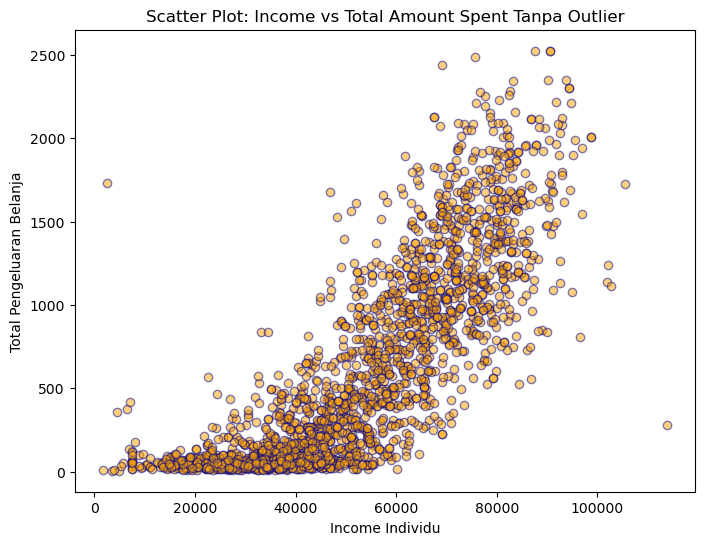

In [56]:
# Melihat korelasi antara income dengan total amount spent setiap individu
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
print('Outliers Detected:')
print(outliers)

df_no_outliers = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

print(f'Data sebelum filter: {len(df)}')
print(f'Data setelah filter: {len(df_no_outliers)}')

plt.figure(figsize=(8, 6))
plt.scatter(df_no_outliers['Income'], df_no_outliers['Total Amount Spent'], alpha=0.5, color='orange', edgecolors='darkblue')


plt.xlabel('Income Individu')
plt.ylabel('Total Pengeluaran Belanja')
plt.title('Scatter Plot: Income vs Total Amount Spent Tanpa Outlier')

plt.show()

Untuk melihat korelasi antar variable Total Spent dengan income, kita akan membuat uji korelasi menggunakan spearman/pearson nantinya

Acuan keyakinan alfa = 5%

In [57]:
# Uji Normalitas data
from scipy.stats import kstest
stat_income, pvalue_income = kstest(df['Income'], 'norm')
stat_spend, pvalue_spend = kstest(df['Total Amount Spent'], 'norm')

print(f'Uji Normalitas P-Value variable Income adalah {pvalue_income}')
print(f'Uji Normalitas P-Value variable Total Amount Spent adalah {pvalue_spend}')

Uji Normalitas P-Value variable Income adalah 0.0
Uji Normalitas P-Value variable Total Amount Spent adalah 0.0


Hasil Uji normalitas data menunjukkan data tidak berdistribusi normal, maka kita akan melakukan uji correlation menggunakan spearman

In [58]:
from scipy.stats import spearmanr
spearman = df['Income'].corr(df['Total Amount Spent'], method = 'spearman')
spearman

if spearman >= 0.05:
    print('Terdapat korelasi dengan arah positif antara Income dengan Total amount spent')

else:
    print('Tidak terdapat korelasi antara Income dan Total amount spent')

Terdapat korelasi dengan arah positif antara Income dengan Total amount spent


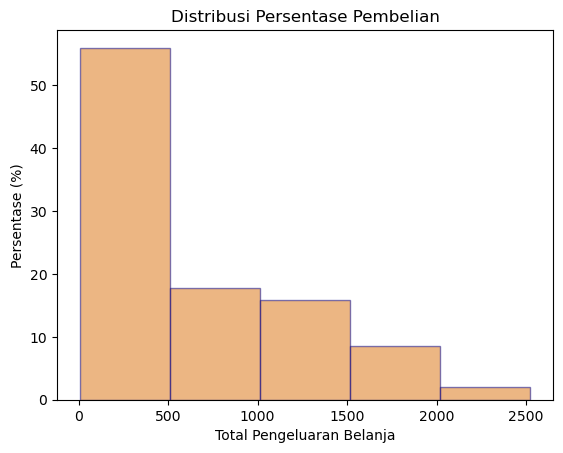

In [59]:
# Membandingkan persentase pengeluaran konsumen

min_value = df['Total Amount Spent'].min()
max_value = df['Total Amount Spent'].max()
bins = np.linspace(min_value, max_value, 6)

plt.hist(df['Total Amount Spent'], bins=bins, weights=np.ones(len(df['Total Amount Spent'])) / len(df['Total Amount Spent']) * 100, alpha=0.5, color="#db6e0896", edgecolor='darkblue')

plt.xlabel('Total Pengeluaran Belanja')
plt.ylabel('Persentase (%)')
plt.title('Distribusi Persentase Pembelian')

# Menampilkan plot
plt.show()

**Temuan** :
+ Konsumen yang datang mayoritas (58%) rela untuk spending hingga 500 ketika berbelanja ke supermarket. Hal ini menandakan pengeluaran yang tidak banyak selama periode pencatatan data transaksi

In [60]:
# Melihat akumulasi produk yang memiliki pengeluaran terbanyak oleh customer
product_stat = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                   'MntSweetProducts', 'MntGoldProds']].agg(['sum'])

product_stat_renamed = product_stat.rename(columns={
    'MntWines': 'Produk Wine',
    'MntFruits': 'Produk Buah',
    'MntMeatProducts': 'Produk Daging',
    'MntFishProducts': 'Produk Ikan',
    'MntSweetProducts': 'Produk Permen',
    'MntGoldProds': 'Produk Emas'
})

product_stat_sort = product_stat_renamed.sort_values(by='sum', axis=1, ascending=False)

# Menampilkan hasil yang sudah diurutkan
display(product_stat_sort)

,Produk Wine,Produk Daging,Produk Emas,Produk Ikan,Produk Permen,Produk Buah
sum,680035,373390,98356,83937,60551,58765


<Figure size 300x300 with 0 Axes>

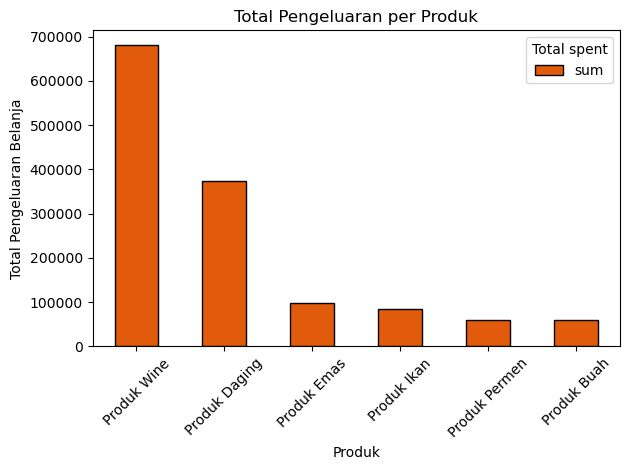

In [61]:
# Membuat plot grafik
plt.figure(figsize=(3, 3))
product_stat_sort.T.plot(kind='bar', color='#e25b0d', edgecolor='black')

plt.title('Total Pengeluaran per Produk')
plt.xlabel('Produk')
plt.ylabel('Total Pengeluaran Belanja')
plt.xticks(rotation=45)
plt.legend(title="Total spent", loc='upper right')
plt.tight_layout()
plt.show()

**Temuan** :
+ Produk unggulan supermarket ini adalah wines yang dimana produk yang kurang laku adalah Fruits

In [62]:
# Membuat table total belanja barang berdasarkan generasi
gen_spend = df.groupby('Generation')[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
gen_spend

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Generation,,,,,,
Elderly,513030,40405,255929,58424,42038,69221
Middle Age,150121,16647,103549,22818,16721,26262
Youth,16884,1713,13912,2695,1792,2873


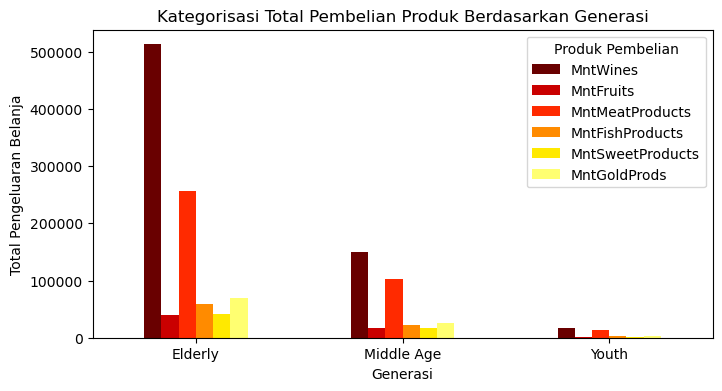

In [63]:
# Membuat bar plot
color_palette = sns.color_palette("hot", n_colors=len(gen_spend.columns))  # Pilih palet warna dan sesuaikan jumlah warnanya
gen_spend.plot(kind='bar', figsize=(8, 4), color=color_palette)

plt.xlabel('Generasi')
plt.ylabel('Total Pengeluaran Belanja')
plt.title('Kategorisasi Total Pembelian Produk Berdasarkan Generasi')

plt.legend(title="Produk Pembelian", loc='upper right')

plt.xticks(rotation=360)

plt.show()

**Temuan** :
+ Berdasarkan total pengeluaran, generasi elderly memiliki pengeluaran terbesar

In [64]:
# Membuat table rata-rata belanja barang berdasarkan generasi
gen_spend1 = df.groupby('Generation')[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].median()
gen_spend1

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Generation,,,,,,
Elderly,219.0,8.0,74.0,12.0,8.0,27.0
Middle Age,47.0,7.0,40.0,11.0,8.0,18.5
Youth,351.0,18.0,282.0,52.0,26.0,45.0


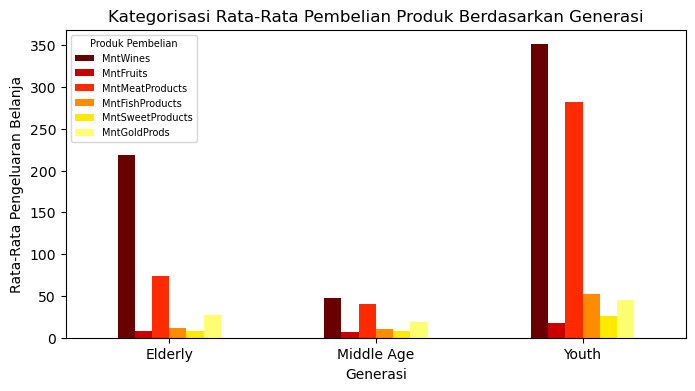

In [65]:
# Membuat bar plot
color_palette = sns.color_palette("hot", n_colors=len(gen_spend1.columns))  # Pilih palet warna dan sesuaikan jumlah warnanya
gen_spend1.plot(kind='bar', figsize=(8, 4), color=color_palette)

plt.xlabel('Generasi')
plt.ylabel('Rata-Rata Pengeluaran Belanja')
plt.title('Kategorisasi Rata-Rata Pembelian Produk Berdasarkan Generasi')

plt.legend(title="Produk Pembelian",title_fontsize=7, loc='upper left', fontsize=7)

plt.xticks(rotation=360)

plt.show()

**Temuan** :
+ Apabila dilihat berdasarkan rata-rata, generasi youth mendominasi tingkat pembelian di supermarket. Hal ini berbeda pada saat dilakukan penjumlahan keseluruhan pengeluaran belanja dikarenakan elderly memiliki proporsi terbesar dalam data supermarket ini. sehingga total pengeluaran belanja lebih besar dibandingkan dengan proporsi youth

In [66]:
# Membuat table Total belanja barang berdasarkan status tinggal
partner_spend = df.groupby('Living_With')[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
partner_spend

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Living_With,,,,,,
Partner,435953,36793,235765,53079,38156,61711
Single,244082,21972,137625,30858,22395,36645


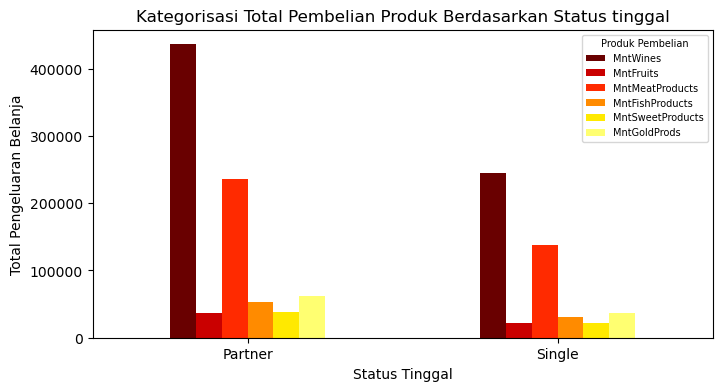

In [67]:
# Membuat bar plot
color_palette3 = sns.color_palette("hot", n_colors=len(partner_spend.columns))
partner_spend.plot(kind='bar', figsize=(8, 4), color=color_palette3)

plt.xlabel('Status Tinggal')
plt.ylabel('Total Pengeluaran Belanja')
plt.title('Kategorisasi Total Pembelian Produk Berdasarkan Status tinggal')

plt.legend(title="Produk Pembelian",title_fontsize=7, loc='upper right', fontsize=7)

plt.xticks(rotation=360)

plt.show()

**Temuan** :
+ Pembelian produk wine memiliki akumulasi pengeluaran total terbesar dibandingkan produk lain di pada semua status. Kemudian disusul dengan pemelian daging dan terendah ada pada buah

In [68]:
# Membuat table rata-rata belanja barang berdasarkan status tinggal
partner_spend1 = df.groupby('Living_With')[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].median()
partner_spend1

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Living_With,,,,,,
Partner,175.5,8.0,66.0,12.0,8.0,22.0
Single,173.0,9.0,70.0,12.0,8.0,27.0


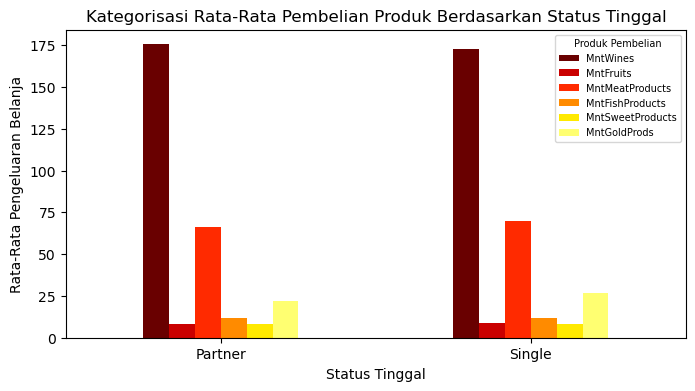

In [69]:
# Membuat bar plot
color_palette4 = sns.color_palette("hot", n_colors=len(partner_spend1.columns))  # Pilih palet warna dan sesuaikan jumlah warnanya
partner_spend1.plot(kind='bar', figsize=(8, 4), color=color_palette4)

plt.xlabel('Status Tinggal')
plt.ylabel('Rata-Rata Pengeluaran Belanja')
plt.title('Kategorisasi Rata-Rata Pembelian Produk Berdasarkan Status Tinggal')

plt.legend(title="Produk Pembelian",title_fontsize=7, loc='upper right', fontsize=7)

plt.xticks(rotation=360)

plt.show()

**Temuan** :
+ Rata-rata pengeluaran belanja berdasarkan status tinggal memiliki pola yang serupa dimana produk dengan pembelian terbesar adalah wine dan disusul dengan daging. Sedangkan prooduk terendah nya adalah buah. Selain itu, berdasarkan status tinggal, kedua kategori ini memiliki kecenderungan rata-rata pembelian yang sama.

In [70]:
# Membuat table rata-rata belanja barang berdasarkan kepemilikan anak
parent_spend = df.groupby('Is_Parent')[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                         'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
parent_spend_renamed = parent_spend.rename(index={0: 'Tidak punya anak', 1: 'Punya anak'})
parent_spend_renamed

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Is_Parent,,,,,,
Tidak punya anak,310143,33258,237160,48731,33787,40701
Punya anak,369892,25507,136230,35206,26764,57655


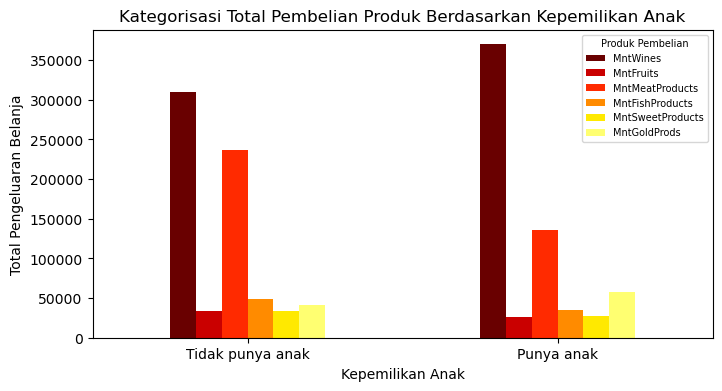

In [71]:
# Membuat bar plot
color_palette6 = sns.color_palette("hot", n_colors=len(parent_spend_renamed.columns))  # Pilih palet warna dan sesuaikan jumlah warnanya
parent_spend_renamed.plot(kind='bar', figsize=(8, 4), color=color_palette4)

plt.xlabel('Kepemilikan Anak')
plt.ylabel('Total Pengeluaran Belanja')
plt.title('Kategorisasi Total Pembelian Produk Berdasarkan Kepemilikan Anak')

plt.legend(title="Produk Pembelian",title_fontsize=7, loc='upper right', fontsize=7)

plt.xticks(rotation=360)

plt.show()

Temuan :
+ Pembelian produk wine menjadi pemeblian produk terbesar di kedua kategori kepemilikan anak secara akumulasi yang disusul dengan produk daging dan terendah pada produk buah.

In [72]:
# Membuat table rata-rata belanja barang berdasarkan status
parent_spend1 = df.groupby('Is_Parent')[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].median()
parent_spend_renamed1 = parent_spend1.rename(index={0: 'Tidak punya anak', 1: 'Punya anak'})
parent_spend_renamed1

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Is_Parent,,,,,,
Tidak punya anak,452.0,33.0,367.0,59.0,35.0,42.0
Punya anak,92.5,4.0,35.0,7.0,5.0,18.0


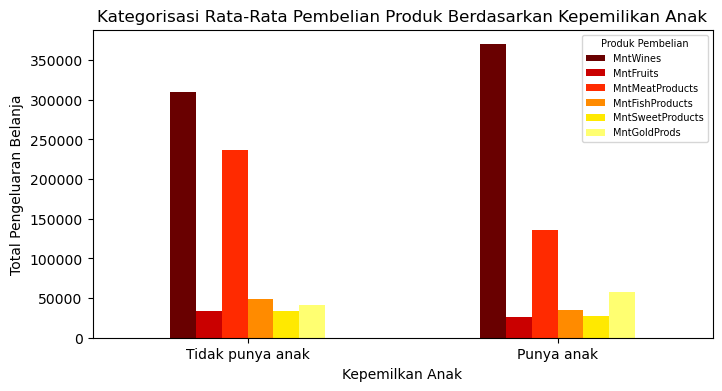

In [73]:
# Membuat bar plot
color_palette7 = sns.color_palette("hot", n_colors=len(parent_spend_renamed.columns))  # Pilih palet warna dan sesuaikan jumlah warnanya
parent_spend_renamed.plot(kind='bar', figsize=(8, 4), color=color_palette4)

plt.xlabel('Kepemilkan Anak')
plt.ylabel('Total Pengeluaran Belanja')
plt.title('Kategorisasi Rata-Rata Pembelian Produk Berdasarkan Kepemilikan Anak')

plt.legend(title="Produk Pembelian",title_fontsize=7, loc='upper right', fontsize=7)

plt.xticks(rotation=360)

plt.show()

Temuan :
+ Pembelian produk wine menjadi pemeblian produk terbesar yang disusul oleh pembelian daging dan pembelian terkecil nya adalah produk buah di kedua kategori kepemilikan anak berdasarkan rata-rata. Dalam plot ini menandakan bahwa secara rata-rata konsumen yang memiliki anak cenderung untuk membeli produk wine sedangkan yang tidak memiliki anak cenderung membeli produk daging

In [74]:
# Membuat perbandingan antara total spent antara status tinggal dengan generasi
Gen_living = df.pivot_table(values='Total Amount Spent', index='Generation', columns='Living_With', aggfunc='sum', fill_value=0)
Gen_living

Living_With,Partner,Single
Generation,,
Elderly,622325,356722
Middle Age,227454,108664
Youth,11678,28191


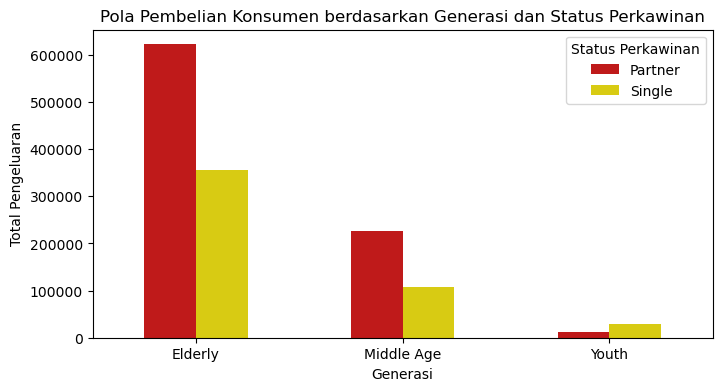

In [75]:
Gen_living.plot(kind='bar', figsize=(8, 4), color=['#bf1a1a', "#d8cb13"])
plt.xlabel('Generasi')
plt.ylabel('Total Pengeluaran')
plt.title('Pola Pembelian Konsumen berdasarkan Generasi dan Status Perkawinan')

plt.legend(title="Status Perkawinan", loc='upper right')
plt.xticks(rotation=360)

plt.show()

**Temuan** :
+ Berdasarkan plot ini, menandakan bahwa kategori partner pada generasi elderly dan middle age memiliki kencendurungan pengeluaran belanja yang besar apabila diakumulasi. Sedangkan generasi youth kecenderungan pengeluaran terbesar secara akumulasi terletak pada kategori single.

In [76]:
# Membuat perbandingan antara rata-rata spent antara status tinggal dengan generasi
Gen_living1 = df.pivot_table(values='Total Amount Spent', index='Generation', columns='Living_With', aggfunc='median', fill_value=0)
Gen_living1

Living_With,Partner,Single
Generation,,
Elderly,444.0,467.5
Middle Age,156.0,160.0
Youth,393.0,1171.5


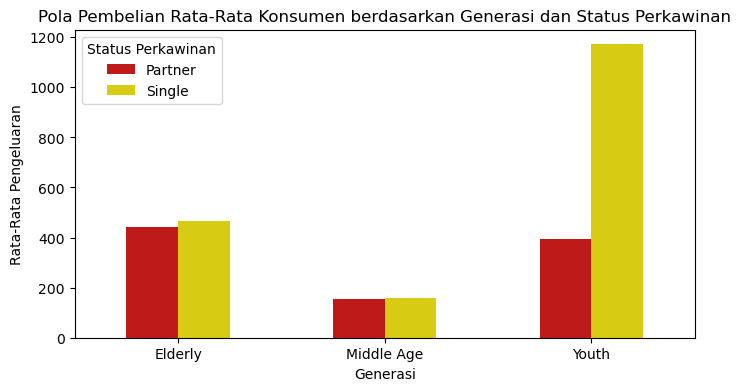

In [77]:
# Plot grafik
Gen_living1.plot(kind='bar', figsize=(8, 4), color=['#bf1a1a', "#d8cb13"])
plt.xlabel('Generasi')
plt.ylabel('Rata-Rata Pengeluaran')
plt.title('Pola Pembelian Rata-Rata Konsumen berdasarkan Generasi dan Status Perkawinan')

plt.legend(title="Status Perkawinan", loc='upper left')
plt.xticks(rotation=360)

plt.show()

**Temuan** :
+ Sedangkan apabila ditinjau secara rata-rata, kategori single cukup mendominasi sedikit pada generasi elderly dan middle age walaupun tidak terlihat signifikan. Sedangkan pada generasi youth terlihat jelas bahwa generasi Youth dengan kategori single lebih banyak melakukan pengeluaran belanja apabila dilihat dari rata-rata

In [78]:
# Mengetahui total spent berdasarkan kepemilikan anak untuk kategori single dan youth
filtered_data = df[(df['Generation'] == 'Youth') & (df['Living_With'] == 'Single')]

total_spent_by_parent = filtered_data.groupby('Is_Parent')['Total Amount Spent'].mean()
total_spent_by_parent_renamed = total_spent_by_parent.rename(index={0: 'Tidak punya anak', 1: 'Punya anak'}).reset_index()
total_spent_by_parent_renamed

,Is_Parent,Total Amount Spent
0,Tidak punya anak,1271.136364
1,Punya anak,56.500000


**Temuan** :
+ Dari table ini juga menjelaskan bahwa rata-rata pengeluaran generasi youth dengan status singgle tanpa anak memiliki pengeluaran yang sangat besar perbandingan nya dengan yang memiliki anak

Temuan : 
1. Rata-rata income terbesar nerada di generasi muda dengan gelar sarjana master

In [79]:
# Membuat perbandingan antara rata-rata pengeluaran setiap transaski antara status tinggal dengan generasi
spend_day = df.pivot_table(values='Spend per transaction', index='Generation', columns='Living_With', aggfunc='median', fill_value=0)
spend_day

Living_With,Partner,Single
Generation,,
Elderly,19.307692,19.510000
Middle Age,9.450000,9.315789
Youth,24.562500,57.002964


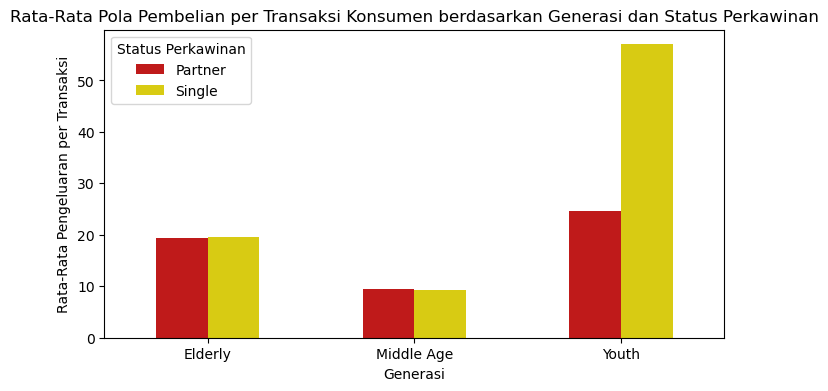

In [80]:
spend_day.plot(kind='bar', figsize=(8, 4), color=['#bf1a1a', "#d8cb13"])
plt.xlabel('Generasi')
plt.ylabel('Rata-Rata Pengeluaran per Transaksi')
plt.title('Rata-Rata Pola Pembelian per Transaksi Konsumen berdasarkan Generasi dan Status Perkawinan')

plt.legend(title="Status Perkawinan", loc='upper left')
plt.xticks(rotation=360)

plt.show()

Temuan :
+ Dari sudut pandang rata-rata pembelian dalam setiap transaksi, terlihat jelas bahwa generasi youth dengan status tinggal single memiliki pola pembelian yang sangat besar dibandingkan dengan generasi lainnya.

    **MELIHAT POLA TEMPAT PEMBELIAN**

In [81]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total Amount Spent,Spend per transaction,Total Purchase,Total Accept Offer,Children,Is_Parent,Living_With,Age,Generation
0,5524,1957,Graduate,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,50.531250,32,1,0,0,Single,68,Elderly
1,2174,1954,Graduate,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,2.454545,11,0,2,1,Single,71,Elderly
2,4141,1965,Graduate,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,31.040000,25,0,0,0,Partner,60,Elderly


Lower Bound: -13611.5, Upper Bound: 117304.5
Outliers Detected:
        ID  Year_Birth Education Marital_Status    Income  Kidhome  Teenhome  \
164   8475        1973       PhD        Married  157243.0        0         1   
617   1503        1976       PhD       Together  162397.0        1         1   
687   1501        1982       PhD        Married  160803.0        0         0   
1300  5336        1971    Master       Together  157733.0        1         0   
1653  4931        1977  Graduate       Together  157146.0        0         0   
2233  9432        1977  Graduate       Together  666666.0        1         0   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
164        98        20          2             1582                1   
617        31        85          1               16                2   
687        21        55         16             1622               17   
1300       37        39          1                9                2   
1653       13  

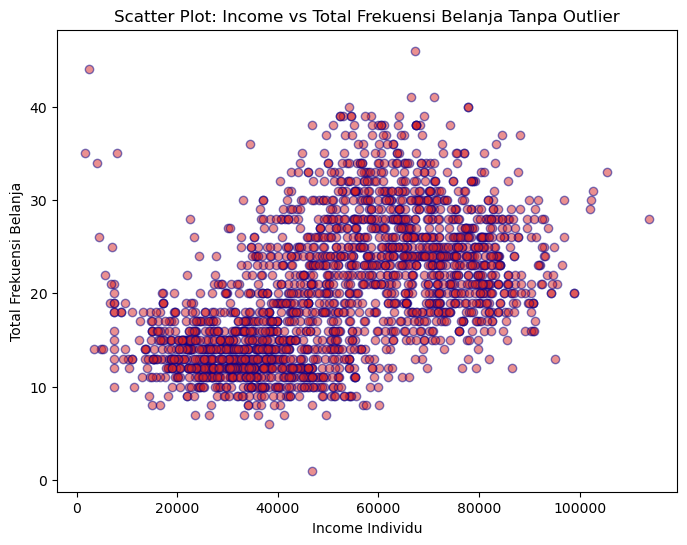

In [82]:
# Melihat korelasi antara income dengan Total frekuensi purchase setiap individu
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
print('Outliers Detected:')
print(outliers)

df_no_outliers = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

print(f'Data sebelum filter: {len(df)}')
print(f'Data setelah filter: {len(df_no_outliers)}')

plt.figure(figsize=(8, 6))
plt.scatter(df_no_outliers['Income'], df_no_outliers['Total Purchase'], alpha=0.5, color="#d62323b9", edgecolors='darkblue')


plt.xlabel('Income Individu')
plt.ylabel('Total Frekuensi Belanja')
plt.title('Scatter Plot: Income vs Total Frekuensi Belanja Tanpa Outlier')

plt.show()

Untuk melihat korelasi antar variable income dengan total frekuensi, kita akan membuat uji korelasi menggunakan spearman/pearson nantinya

Acuan keyakinan alfa = 5%

In [83]:
# Uji Normalitas data
stat_income, pvalue_income2 = kstest(df['Income'], 'norm')
stat_spend, pvalue_spend2 = kstest(df['Total Purchase'], 'norm')

print(f'Uji Normalitas P-Value variable Income adalah {pvalue_income2}')
print(f'Uji Normalitas P-Value variable Total Amount Spent adalah {pvalue_spend2}')

Uji Normalitas P-Value variable Income adalah 0.0
Uji Normalitas P-Value variable Total Amount Spent adalah 0.0


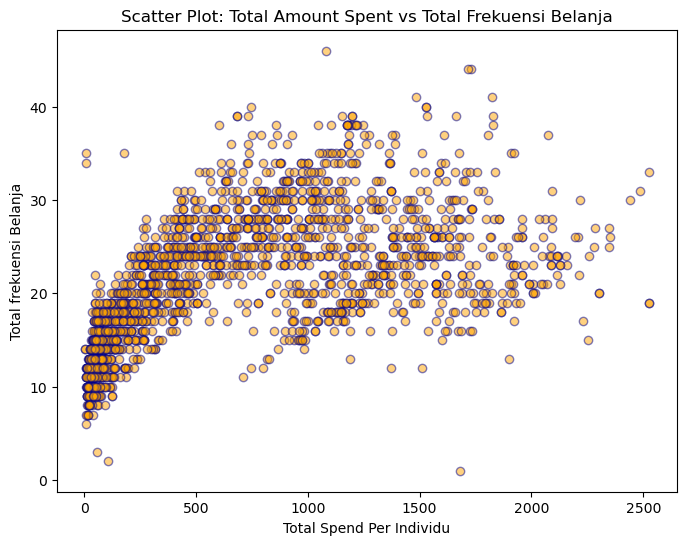

In [84]:
# Melihat asosiasi antara variable Total frekuensi purchase dengan Total amount spent
plt.figure(figsize=(8, 6))
plt.scatter(df['Total Amount Spent'], df['Total Purchase'], alpha=0.5, color='orange', edgecolors='darkblue')


plt.xlabel('Total Spend Per Individu')
plt.ylabel('Total frekuensi Belanja')
plt.title('Scatter Plot: Total Amount Spent vs Total Frekuensi Belanja')

plt.show()

Untuk melihat korelasi antar variable Total Spent dengan total frekuensi, kita akan membuat uji korelasi menggunakan spearman/pearson nantinya

Acuan keyakinan alfa = 5%

In [85]:
# Uji Normalitas data
stat_income, pvalue_income1 = kstest(df['Total Amount Spent'], 'norm')
stat_spend, pvalue_spend1 = kstest(df['Total Purchase'], 'norm')

print(f'Uji Normalitas P-Value variable Income adalah {pvalue_income1}')
print(f'Uji Normalitas P-Value variable Total Amount Spent adalah {pvalue_spend1}')

Uji Normalitas P-Value variable Income adalah 0.0
Uji Normalitas P-Value variable Total Amount Spent adalah 0.0


In [86]:
spearman1 = df['Total Amount Spent'].corr(df['Total Purchase'], method = 'spearman')
spearman1

if spearman1 >= 0.05:
    print('Terdapat korelasi dengan arah positif antara Income dengan Total amount spent')

else:
    print('Tidak terdapat korelasi antara Income dan Total amount spent')

Terdapat korelasi dengan arah positif antara Income dengan Total amount spent


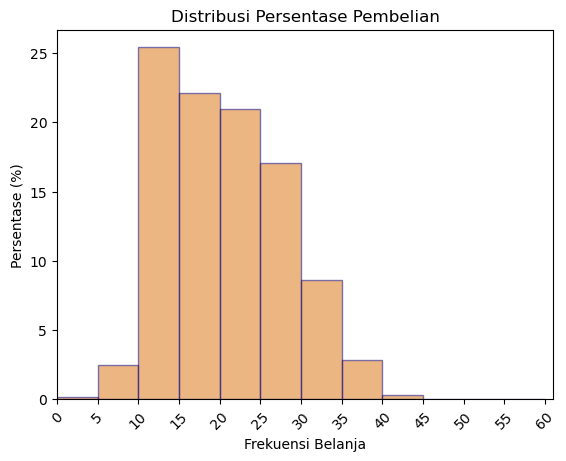

In [134]:
# Membandingkan persentase frekuensi pembelian konsumen
bins4 = np.arange(0, 61, 5)

plt.hist(df['Total Purchase'], bins=bins4, weights=np.ones(len(df['Total Purchase'])) / len(df['Total Purchase']) * 100, alpha=0.5, color="#db6e0896", edgecolor='darkblue')

plt.xlabel('Frekuensi Belanja')
plt.ylabel('Persentase (%)')
plt.title('Distribusi Persentase Pembelian')
plt.xlim(0, 61)
plt.xticks(np.arange(0, 61, 5), rotation=45)
plt.show()

In [88]:
# Melihat akumulasi lokasi konsumen membeli yang terbanyak
loc_stat = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].agg(['sum'])

loc_stat_renamed = loc_stat.rename(columns={
    'NumWebPurchases': 'Website',
    'NumCatalogPurchases': 'Katalog',
    'NumStorePurchases': 'Store',
})

loc_stat_sort = loc_stat_renamed.sort_values(by='sum', axis=1, ascending=False)

# Menampilkan hasil yang sudah diurutkan
display(loc_stat_sort)

,Store,Website,Katalog
sum,12962,9143,5956


<Figure size 300x300 with 0 Axes>

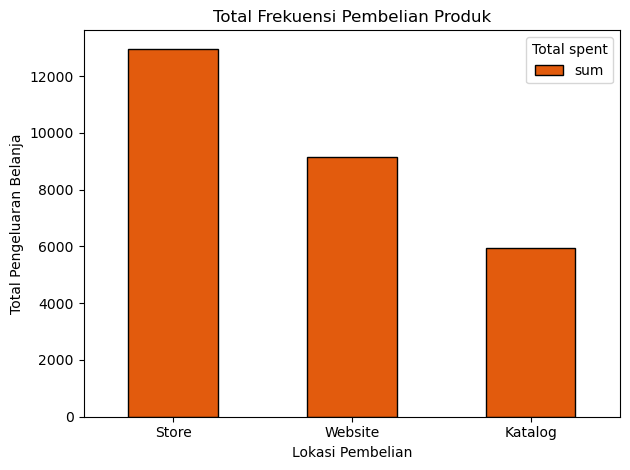

In [89]:
# Membuat plot grafik
plt.figure(figsize=(3, 3))
loc_stat_sort.T.plot(kind='bar', color='#e25b0d', edgecolor='black')

plt.title('Total Frekuensi Pembelian Produk')
plt.xlabel('Lokasi Pembelian')
plt.ylabel('Total Pengeluaran Belanja')
plt.xticks(rotation=360)
plt.legend(title="Total spent", loc='upper right')
plt.tight_layout()
plt.show()

Temuan :
1. Pembelian pembelian melalui store lebih tinggi dibandingkan dengan lokasi pembelian lainnya

In [90]:
# Membuat table frekuensi preferensi lokasi pembelian barang oleh konsumen berdasarkan generasi
loc_gen3 = df.groupby('Generation')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()

loc_gen3

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Generation,,,
Elderly,6650,4335,9259
Middle Age,2336,1437,3436
Youth,157,184,267


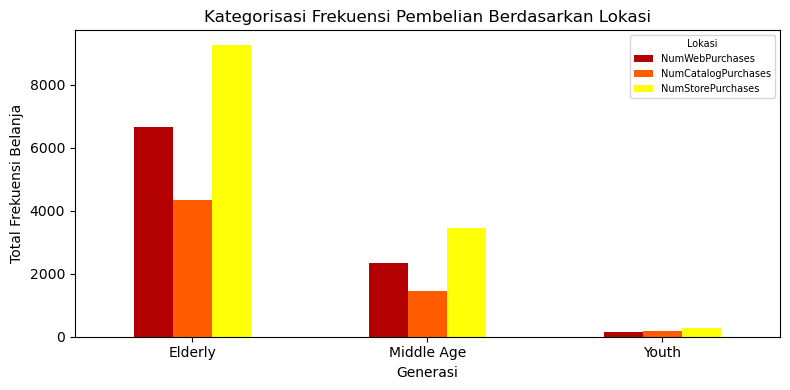

In [91]:
#Membuat bar plot
color_palette2 = sns.color_palette("hot", n_colors=len(loc_gen3.columns))
loc_gen3.plot(kind='bar', figsize=(8, 4), color=color_palette2)

plt.xlabel('Generasi')
plt.ylabel('Total Frekuensi Belanja')
plt.title('Kategorisasi Frekuensi Pembelian Berdasarkan Lokasi')

plt.xticks(rotation=360)
plt.legend(title="Lokasi",title_fontsize=7, loc='upper right', fontsize=7)

plt.tight_layout()
plt.show()

Temuan :
1. Secara akumulasi, generasi elderly mendominasi belian disemua lokasi berbelanja. Hal ini disebabkan frekuensi pengunjung elderly memiliki porsi yang lebih besar dibandingkan generasi lain

In [92]:
# Membuat table frekuensi preferensi lokasi pembelian barang oleh konsumen berdasarkan generasi
loc_gen = df.groupby('Generation')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].median()

loc_gen

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Generation,,,
Elderly,4.0,2.0,5.0
Middle Age,3.0,1.0,4.0
Youth,3.0,4.0,6.0


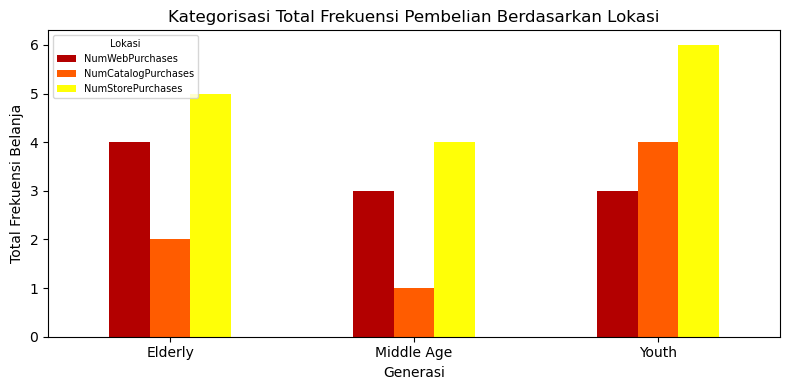

In [93]:
#Membuat bar plot
color_palette1 = sns.color_palette("hot", n_colors=len(loc_gen.columns))
loc_gen.plot(kind='bar', figsize=(8, 4), color=color_palette1)

plt.xlabel('Generasi')
plt.ylabel('Total Frekuensi Belanja')
plt.title('Kategorisasi Total Frekuensi Pembelian Berdasarkan Lokasi')

plt.xticks(rotation=360)
plt.legend(title="Lokasi",title_fontsize=7, loc='upper left', fontsize=7)

plt.tight_layout()
plt.show()

Temuan :
1. Apabila dilihat secara rata-rata, frekuensi pembelian melalui store pada generasi muda memiliki nilai tertinggi. Dapat disimpulkan bahwa generasi youth memiliki frekuensi berkunjung untuk berbelanja lebih besar dibandingkan generasi lainnya

In [94]:
# Membuat table frekuensi preferensi lokasi pembelian barang oleh konsumen berdasarkan generasi
partner = df.groupby('Living_With')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()

partner

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Living_With,,,
Partner,5895,3814,8378
Single,3248,2142,4584


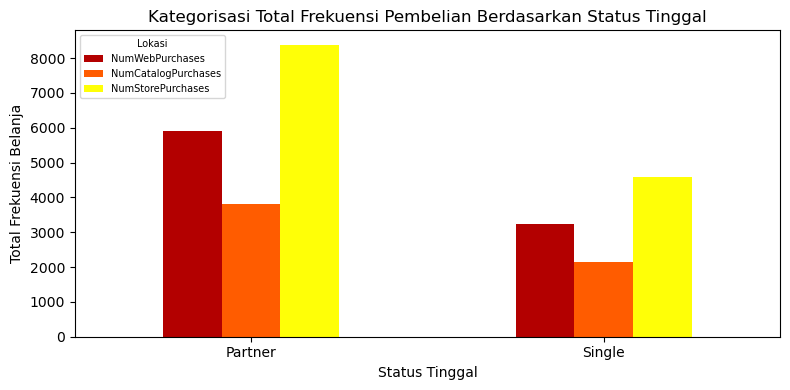

In [95]:
#Membuat bar plot
color_palette5 = sns.color_palette("hot", n_colors=len(partner.columns))
partner.plot(kind='bar', figsize=(8, 4), color=color_palette5)

plt.xlabel('Status Tinggal')
plt.ylabel('Total Frekuensi Belanja')
plt.title('Kategorisasi Total Frekuensi Pembelian Berdasarkan Status Tinggal')

plt.xticks(rotation=360)
plt.legend(title="Lokasi",title_fontsize=7, loc='upper left', fontsize=7)

plt.tight_layout()
plt.show()

Temuan :
1. Berdasarkan total frekuensi pembelian, status partner mendominasi frekuensi pembelian di semua lokasi

In [96]:
# Membuat table frekuensi preferensi lokasi pembelian barang oleh konsumen berdasarkan generasi
partner1 = df.groupby('Living_With')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].median()

partner1

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Living_With,,,
Partner,4.0,2.0,5.0
Single,4.0,2.0,5.0


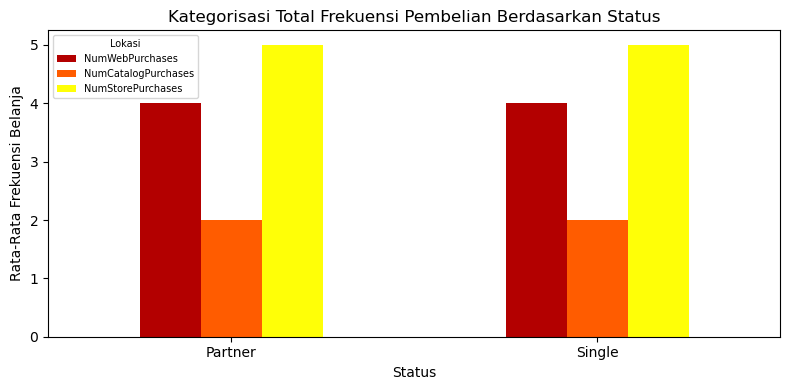

In [97]:
 #Membuat bar plot
color_palette7 = sns.color_palette("hot", n_colors=len(partner1.columns))
partner1.plot(kind='bar', figsize=(8, 4), color=color_palette7)

plt.xlabel('Status')
plt.ylabel('Rata-Rata Frekuensi Belanja')
plt.title('Kategorisasi Total Frekuensi Pembelian Berdasarkan Status')

plt.xticks(rotation=360)
plt.legend(title="Lokasi",title_fontsize=7, loc='upper left', fontsize=7)

plt.tight_layout()
plt.show()

Temuan :
1. Kategori single dan partner memiliki nilai rata-rata yang mendekat di semua preferensi lokasi pembelian

Temuan :
1. Kategori single secara rata-rata memiliki frekuensi yang sama

In [98]:
# Membuat table total belanja barang berdasarkan kepemilikan anak
parent_purc = df.groupby('Is_Parent')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()
parent_purc_renamed = parent_purc.rename(index={0: 'Tidak punya anak', 1: 'Punya anak'})
parent_purc_renamed

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Is_Parent,,,
Tidak punya anak,2799,3030,4631
Punya anak,6344,2926,8331


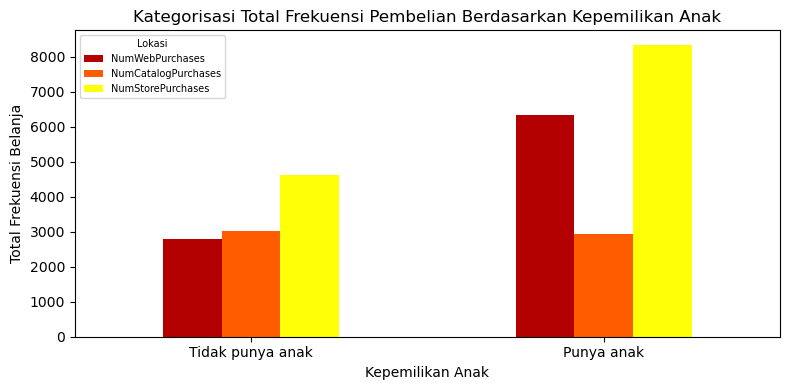

In [99]:
color_palette8 = sns.color_palette("hot", n_colors=len(parent_purc_renamed.columns))
parent_purc_renamed.plot(kind='bar', figsize=(8, 4), color=color_palette8)

plt.xlabel('Kepemilikan Anak')
plt.ylabel('Total Frekuensi Belanja')
plt.title('Kategorisasi Total Frekuensi Pembelian Berdasarkan Kepemilikan Anak')

plt.xticks(rotation=360)
plt.legend(title="Lokasi",title_fontsize=7, loc='upper left', fontsize=7)

plt.tight_layout()
plt.show()

Temuan:
1. Secara akumulasi, kategori punya anak memiliki frekuensi terbesar dibandingkan dengan tidak punya anak dengan frekuensi terbesar pembelian melalui store dan terendah melalui katalog

In [100]:
# Membuat table rata-rata belanja barang berdasarkan kepemilikan anak
parent_purc1 = df.groupby('Is_Parent')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].median()
parent_purc_renamed1 = parent_purc1.rename(index={0: 'Tidak punya anak', 1: 'Punya anak'})
parent_purc_renamed1

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Is_Parent,,,
Tidak punya anak,4.0,5.0,7.0
Punya anak,3.0,1.0,4.0


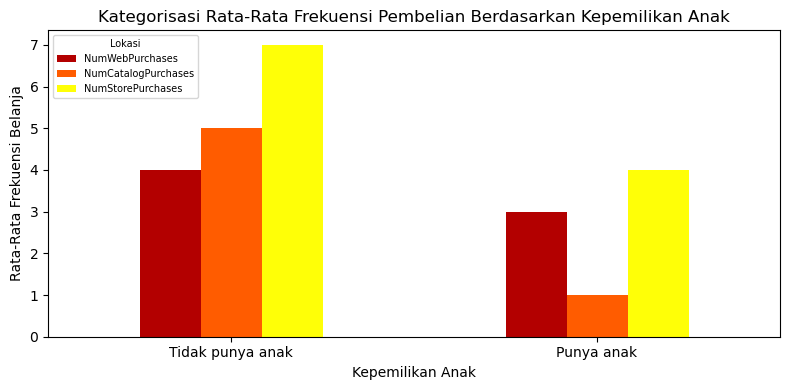

In [101]:
color_palette9 = sns.color_palette("hot", n_colors=len(parent_purc_renamed1.columns))
parent_purc_renamed1.plot(kind='bar', figsize=(8, 4), color=color_palette9)

plt.xlabel('Kepemilikan Anak')
plt.ylabel('Rata-Rata Frekuensi Belanja')
plt.title('Kategorisasi Rata-Rata Frekuensi Pembelian Berdasarkan Kepemilikan Anak')

plt.xticks(rotation=360)
plt.legend(title="Lokasi",title_fontsize=7, loc='upper left', fontsize=7)

plt.tight_layout()
plt.show()

Temuan :
1. Secara Rata-rata, kategori tidak punya anak memiliki frekuensi pembelian terbesar pada pembelian di store dengan frekuensi pembelian terendah pada website 

In [102]:
# Membuat perbandingan antara total frekuensi pembelian antara status tinggal dengan generasi
Gen_living_purchase = df.pivot_table(values='Total Purchase', index='Generation', columns='Living_With', aggfunc='sum', fill_value=0)
Gen_living_purchase

Living_With,Partner,Single
Generation,,
Elderly,20553,11562
Middle Age,8309,3876
Youth,324,541


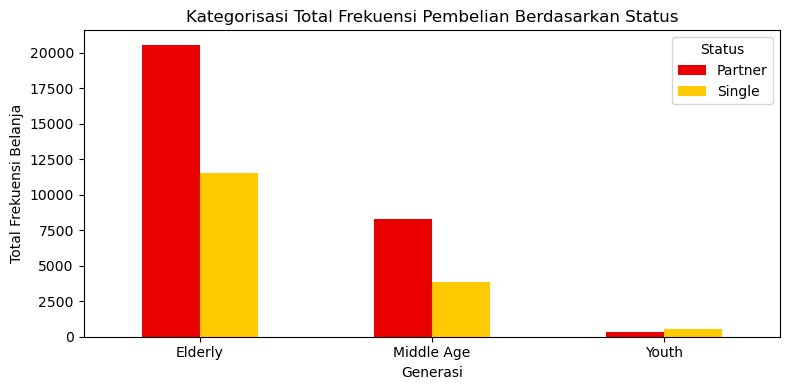

In [103]:
color_palette10 = sns.color_palette("hot", n_colors=len(Gen_living_purchase.columns))
Gen_living_purchase.plot(kind='bar', figsize=(8, 4), color=color_palette10)

plt.xlabel('Generasi')
plt.ylabel('Total Frekuensi Belanja')
plt.title('Kategorisasi Total Frekuensi Pembelian Berdasarkan Status')

plt.xticks(rotation=360)
plt.legend(title="Status",title_fontsize=10, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

Temuan :
1. Secara total status elderly dengan status partner memiliki frekuensi terbesar dibandingkan dengan generasi lainnya

In [104]:
# Membuat perbandingan antara rata-rata frekuensi pembelian antara status tinggal dengan generasi
Gen_living_purchase1 = df.pivot_table(values='Total Purchase', index='Generation', columns='Living_With', aggfunc='median', fill_value=0)
Gen_living_purchase1

Living_With,Partner,Single
Generation,,
Elderly,20.0,20.0
Middle Age,18.0,17.0
Youth,19.0,21.0


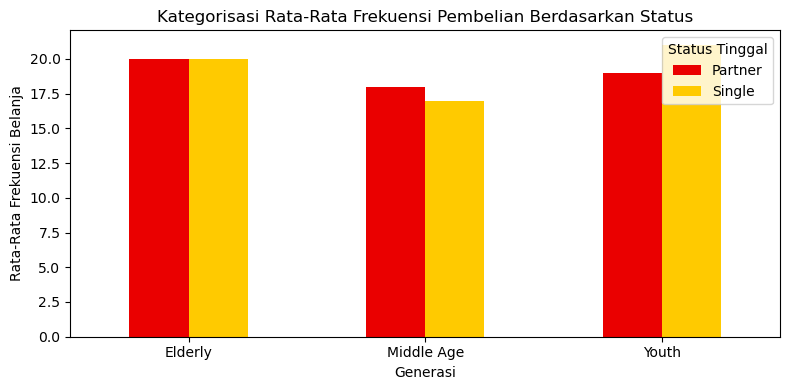

In [105]:
color_palette11 = sns.color_palette("hot", n_colors=len(Gen_living_purchase1.columns))
Gen_living_purchase1.plot(kind='bar', figsize=(8, 4), color=color_palette11)

plt.xlabel('Generasi')
plt.ylabel('Rata-Rata Frekuensi Belanja')
plt.title('Kategorisasi Rata-Rata Frekuensi Pembelian Berdasarkan Status')

plt.xticks(rotation=360)
plt.legend(title="Status Tinggal",title_fontsize=10, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

Temuan :
1. Rata-Rata frekuensi belanja terlihat hampir sama besar. namun dominasi frekuensi pembelian terbesar didapatkan pada kategori single youth

**EFEKTIFITAS CAMPAIGN**

In [106]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total Amount Spent,Spend per transaction,Total Purchase,Total Accept Offer,Children,Is_Parent,Living_With,Age,Generation
0,5524,1957,Graduate,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,50.531250,32,1,0,0,Single,68,Elderly
1,2174,1954,Graduate,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,2.454545,11,0,2,1,Single,71,Elderly
2,4141,1965,Graduate,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,31.040000,25,0,0,0,Partner,60,Elderly


    **EFEK DISCOUNT**

In [107]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total Amount Spent,Spend per transaction,Total Purchase,Total Accept Offer,Children,Is_Parent,Living_With,Age,Generation
0,5524,1957,Graduate,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,50.531250,32,1,0,0,Single,68,Elderly
1,2174,1954,Graduate,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,2.454545,11,0,2,1,Single,71,Elderly
2,4141,1965,Graduate,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,31.040000,25,0,0,0,Partner,60,Elderly


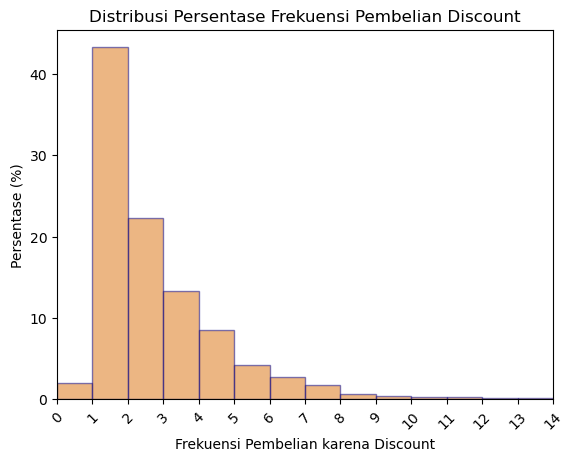

In [108]:
# Distribusi penggunaan discount
bins4 = np.arange(0, 15, 1)

plt.hist(df['NumDealsPurchases'], bins=bins4, weights=np.ones(len(df['NumDealsPurchases'])) / len(df['NumDealsPurchases']) * 100, alpha=0.5, color="#db6e0896", edgecolor='darkblue')

plt.xlabel('Frekuensi Pembelian karena Discount')
plt.ylabel('Persentase (%)')
plt.title('Distribusi Persentase Frekuensi Pembelian Discount')
plt.xlim(0, 14)
plt.xticks(np.arange(0, 15, 1), rotation=45)
plt.show()

**Temuan**:
+ Berdasarkan persentase frekuensi pembelian konsumen menggunakan discount, terlihat bahwa persentase terbesar berapa pada di angka 2-3 kali pembelian sebsar 45%. Hal menandakan bahwa sangat sedikit konsumen yang melakukan pembelian karena penggunaan discount

In [109]:
# Melihat segment konsumen yang paling banyak melakukan pembelian discount pada rentang 0-3 kali
discount_filtered = df[df['NumDealsPurchases'].isin([0, 1, 2, 3])]
display(discount_filtered)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total Amount Spent,Spend per transaction,Total Purchase,Total Accept Offer,Children,Is_Parent,Living_With,Age,Generation
0,5524,1957,Graduate,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,50.531250,32,1,0,0,Single,68,Elderly
1,2174,1954,Graduate,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,2.454545,11,0,2,1,Single,71,Elderly
2,4141,1965,Graduate,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,31.040000,25,0,0,0,Partner,60,Elderly
3,6182,1984,Graduate,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,3.785714,14,0,1,1,Partner,41,Middle Age
5,7446,1967,Master,Together,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,716,25.571429,28,0,1,1,Partner,58,Elderly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974,Graduate,Married,34421.0,1,0,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,0,30,2.727273,11,0,1,1,Partner,51,Elderly
2235,10870,1967,Graduate,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,1341,58.304348,23,0,1,1,Partner,58,Elderly
2237,7270,1981,Graduate,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,1241,49.640000,25,1,0,0,Single,44,Middle Age
2238,8235,1956,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,843,32.423077,26,0,1,1,Partner,69,Elderly


In [110]:
# Membuat kolom perbandingan frekuensi terbesar dari pembelian discount berdasarkan generasi dan status tinggal
gen_disc = discount_filtered.pivot_table(values = 'NumDealsPurchases', index ='Generation', columns = 'Living_With', aggfunc = 'median', fill_value=0)
gen_disc

Living_With,Partner,Single
Generation,,
Elderly,1.0,1.0
Middle Age,1.0,1.0
Youth,1.0,1.0


**Temuan**:
+ Secara rata-rata, pembelian disetiap kategori generasi dan status tinggal memiliki nilai yang sama. Tidak ada perbedaan perilaku dalam hal ketertarikan pembelian barang discount

    **EFEK CAMPAIGN**

In [111]:
# Mencari nilai 1 di setiap kolom campaign
campaign = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Response']

accept = df[campaign].apply(lambda x: (x == 1).sum())

accept_df = accept.reset_index()
accept_rename = accept_df.rename(columns={accept_df.columns[0]: 'Aktivitas Campaign', accept_df.columns[1]: 'Total Konsumen'})
accept_rename = accept_rename.set_index('Aktivitas Campaign')

accept_sorted = accept_rename.sort_values(by = 'Total Konsumen', ascending = False)

accept_sorted

,Total Konsumen
Aktivitas Campaign,
Response,334
AcceptedCmp4,167
AcceptedCmp3,163
AcceptedCmp5,162
AcceptedCmp1,144
AcceptedCmp2,30


<Figure size 300x300 with 0 Axes>

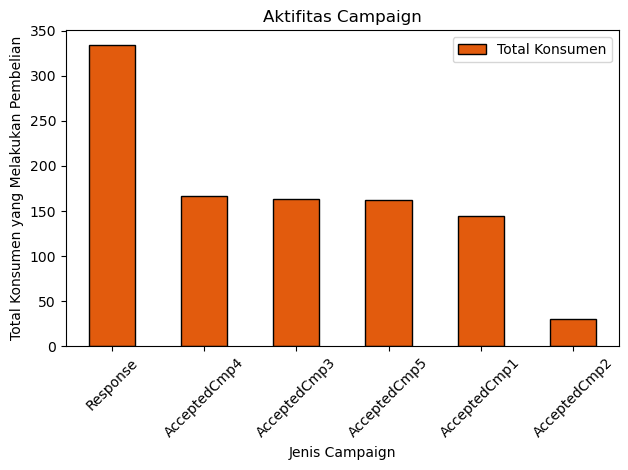

In [112]:
# Membuat plot grafik
plt.figure(figsize=(3, 3))
accept_sorted.plot(kind='bar', color='#e25b0d', edgecolor='black')

plt.title('Aktifitas Campaign')
plt.xlabel('Jenis Campaign')
plt.ylabel('Total Konsumen yang Melakukan Pembelian')
plt.xticks(rotation=45)
plt.legend(title="", loc='upper right')
plt.tight_layout()
plt.show()

**Temuan**:
+ Berdasarkan konsumen yang menerima offer, campaign2 memiliki efektifitas terendah dibandingkan campaign lainnya. Sedangkan campaign paling efektif adalah campaign yang dilakukan terakhir ini

In [113]:
# Mencari persentase orang yang melakukan transaksi di keenam campaign, kelima campaign, dst..
total_accept = df['Total Accept Offer'].value_counts().reset_index()

total_accept_index = total_accept.set_index('Total Accept Offer')

total_accept_index['Percentage'] = (total_accept_index['count'] / total_accept_index['count'].sum()) * 100

total_accept_index

,count,Percentage
Total Accept Offer,,
0,1627,72.796421
1,369,16.510067
2,142,6.353468
3,51,2.281879
4,36,1.610738
5,10,0.447427


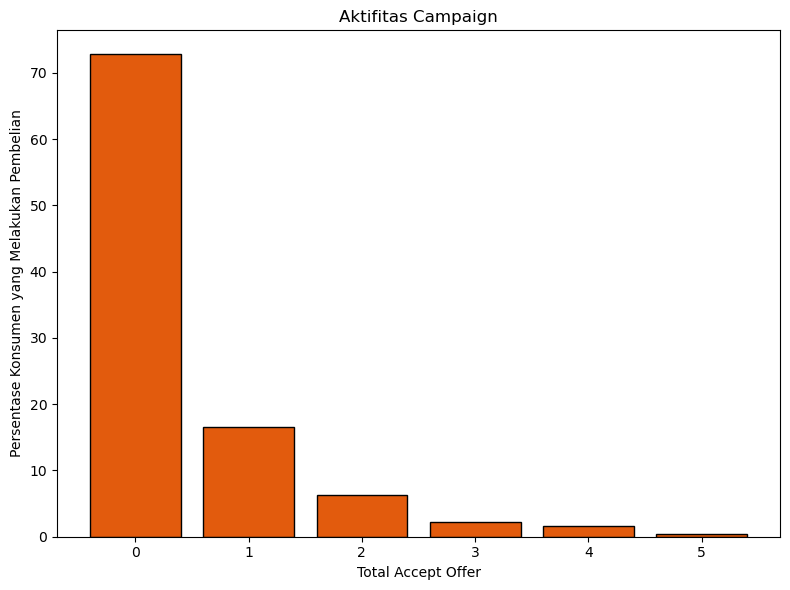

In [114]:
# Membuat plot dengan ukuran yang lebih besar
plt.figure(figsize=(8, 6))

plt.bar(total_accept_index.index, total_accept_index['Percentage'], color='#e25b0d', edgecolor='black')

plt.title('Aktifitas Campaign')
plt.xlabel('Total Accept Offer')
plt.ylabel('Persentase Konsumen yang Melakukan Pembelian')

plt.xticks(rotation=360)

plt.tight_layout()
plt.show()

**Temuan** :
+ Dari sini terlihat jelas bahwa persentase terbesar adalah konsumen yang melakukan tanpa menerima campaign. Disisi lain terlihat juga bahwa tidak ada konsumen yang melakukan perbelanjaan menggunakan keenam campaign

> SEGMENTASI KONSUMEN LAMA MENGGUNAKAN METODE RFM

In [115]:
# Membuat group RFM
rfm = df.groupby(['ID']).agg({'Recency':'sum', 'Total Purchase':'sum', 'Total Amount Spent':'sum'})
rfm_renamed = rfm.rename(columns={'Total Purchase': 'Frequency', 'Total Amount Spent': 'Monetary'})
rfm_renamed

,Recency,Frequency,Monetary
ID,,,
0,66,18,1198
1,0,23,577
9,86,19,120
13,57,12,32
17,81,33,1028
...,...,...,...
11176,12,21,495
11178,69,12,32
11187,23,14,69


In [120]:
# Menghitung quantiles (kuartil) untuk setiap kolom (Recency, Frequency, Monetary)
recency_quantiles = pd.qcut(rfm_renamed['Recency'], 3, labels=[3,2,1])
frequency_quantiles = pd.qcut(rfm_renamed['Frequency'], 3, labels=[1, 2, 3])
monetary_quantiles = pd.qcut(rfm_renamed['Monetary'], 3, labels=[1, 2, 3])

rfm_renamed['Recency_Score'] = recency_quantiles
rfm_renamed['Frequency_Score'] = frequency_quantiles
rfm_renamed['Monetary_Score'] = monetary_quantiles

rfm_renamed['RFM_Score'] = rfm_renamed['Recency_Score'].astype(str) + rfm_renamed['Frequency_Score'].astype(str) + rfm_renamed['Monetary_Score'].astype(str)
rfm_renamed['RFM_Total_Score']=rfm_renamed[['Recency_Score','Frequency_Score','Monetary_Score']].sum(axis=1)

# Fungsi untuk mengkategorikan berdasarkan RFM score
def categorize_rfm(row):
    if row['Recency_Score'] in [2] and row['Frequency_Score'] in [1, 2, 3] and row['Monetary_Score'] in [1, 2, 3]:
        return 'Potential Loyal Customer'
    elif row['Recency_Score'] in [3] and row['Frequency_Score'] in [1, 2] and row['Monetary_Score'] in [1, 2, 3]:
        return 'New Customer'
    elif row['Recency_Score'] in [3] and row['Frequency_Score'] in [3] and row['Monetary_Score'] in [1,2]:
        return 'Loyal Customer'
    elif row['Recency_Score'] == 1 and row['Frequency_Score'] == 3 and row['Monetary_Score'] in [1, 2,3]:
        return 'At Risk'
    elif row['Recency_Score'] == 1 and row['Frequency_Score'] in [1, 2] and row['Monetary_Score'] in [1, 2,3]:
        return 'About To Dump You'
    else:
        return 'Soulmates'

# Menambahkan kolom kategori ke dataframe
rfm_renamed['Customer_Category'] = rfm_renamed.apply(categorize_rfm, axis=1)

# Menampilkan hasil
rfm_renamed[['RFM_Score', 'Customer_Category']]

display(rfm_renamed[['Recency', 'Frequency', 'Monetary', 'Recency_Score', 'Frequency_Score', 'Monetary_Score', 'RFM_Score','RFM_Total_Score','Customer_Category']].head(10))

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,RFM_Total_Score,Customer_Category
ID,,,,,,,,,
0,66,18,1198,1,2,3,123,6,About To Dump You
1,0,23,577,3,2,2,322,7,New Customer
9,86,19,120,1,2,2,122,5,About To Dump You
13,57,12,32,2,1,1,211,4,Potential Loyal Customer
17,81,33,1028,1,3,3,133,7,At Risk
20,91,12,183,1,1,2,112,4,About To Dump You
22,99,22,309,1,2,2,122,5,About To Dump You
24,96,19,47,1,2,1,121,4,About To Dump You
25,9,25,1115,3,3,3,333,9,Soulmates


In [121]:
# Menghitung jumlah value di kolom Customer_Category
category_counts = rfm_renamed['Customer_Category'].value_counts().reset_index()
category_counts

,Customer_Category,count
0,Potential Loyal Customer,730
1,New Customer,548
2,About To Dump You,543
3,At Risk,200
4,Soulmates,127
5,Loyal Customer,87


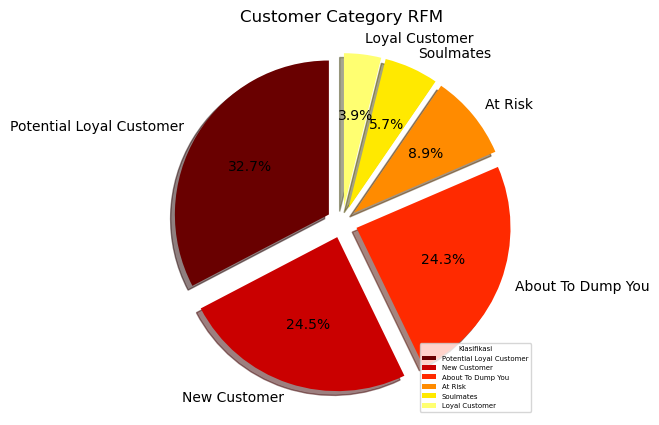

In [127]:
# Membuat heatmap untuk kategori
# Plot pie chart
color2 = sns.color_palette("hot", len(category_counts))

plt.figure(figsize=(5, 5))
plt.pie(x=category_counts['count'], labels=category_counts['Customer_Category'], explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1], autopct='%1.1f%%', 
        shadow=True, startangle=90, colors=color2)

plt.title('Customer Category RFM')

plt.legend(title="Klasifikasi", title_fontsize=5, loc='lower right', fontsize=5)

plt.show()

**Temuan** :
+ Soulmates : Konsumen yang paling sering datang dalam waktu dekat dan sering membeli dengan jumlah banyak
+ Loyal Customer : Konsumen yang sering datang dalam waktu dengan namun tidak melakukan pembelian dari jumlah banyak
+ Potential Customer :  konsumen yang memiliki kecenderungan untuk menjadi konsumen tetap
+ New Customer : Konsumen yang baru saja datang untuk membeli
+ At Risk : Konsumen yang berpotensi untuk tidak berbelanja lagi 
+ About To Dump You : Konsumen yang tidak interest untuk berbelanja di suatu tempat

> Kesimpulan

1.	Melihat dari sebaran generasi, konsumen dengan generasi elderly memiliki volume pendatang yang terbesar (68%)  di antara generasi middle age dan youth. 
2.	Perbandingan status tinggal partner memiliki komposisi tertinggi (64,6%) dibandingkan dengan status single dimana persentase memiliki anak (73%) yang menjadi dominan di kedua status terebut 
3.	Berdasarkan level edukasi konsumen didominasi dengan gelar sarjana (50.4%) dan terendah pada berstatus masih menempuh gelar pendidikan (11.4%)
4.	Melihat persentase income terbesar dari konsumen, terlihat bahwa rentang pendapatan konsumen berada di angka 10000 – 160000 dengan persentase terbesar pada range 20000 – 70000 (55%)
5.	Terdapat korelasi yang signifikan antara tingkat pendapatan dengan jumlah pembelian produk.
6.	Berdasarkan pola pembelian konsumen, pengeluaran belanja per individu konsumen direntang 1-2500 dengan persentase terbesar pada range 1-500 (55%)
7.	Produk yang paling sering dibeli oleh konsumen adalah produk wine dimana peminat tertinggi adalah yang bergenerasi youth dan single tanpa kepemilikan anak 
8.	Terdapat korelasi yang signifikan antara tingkat pendapatan dengan frekuensi pembelian produk.
9.	Berdasarkan pola frekuensi pembelian konsumen, frekuensi belanja per individu konsumen direntang 1- 45 dengan persentase terbesar pada range 10-30 kali (75%)
10.	Melihat pola frekuensi transaksi konsumen, generasi youth dengan status single tetap mendominasi frekuensi pembelian.
11.	Penggunaan discount dalam berbelanja kurang efektif dikarenakan mayoritas konsumen (45%) hanya menggunakan 1-2 kali transaksi.
12.	Campaign terakhir lebih efektif dibandingkan campaing lainnya. Selain itu terdapat ketidakefektifan campaign dikarenakan terdapat persentase yang besar (70%) konsumen yang tidak menerima campaign sama sekali.
13.	Berdasarkan segmentasi RFM, persentase terbesar adalah potential loyal customer sebsar 32.7% dan terendah adalah Loyal customer.

> Rekomendasi

**Segmen Demografi Konsumen** :
1.	Untuk melakukan akuisisi konsumen baru target demografi konsumen dengan generasi muda dan single tanpa anak memiliki potensi yang besar. Hal ini tercermin dari pola pembelian yang lebih konsumtif di supermarket dengan rata-rata pembelian dalam satu kali transaksi adalah 50$. Selain itu, kategori ini juga mendominasi frekuensi pembelian produk di supermarket dengan rata-rata 20 kali dalam satu periode.
2.	Konsumen lebih tertarik untuk belanja melalui store secara langsung, sehingga campaign selanjutnya menerapkan strategi campaign ke-6 yang berfokuskan pada store dan sesuai dengan target demografi konsumen.
3.	Untuk produk pembelian, strategi campaign yang cocok adalah pada produk wine dan daging.
4.	Perihal dengan existing konsumen, supermarket perlu fokus hanya pada konsumen dengan kategori potential loyal customer dan new customer.